# Notebook containing the scripts to compare, quantitatively, the mean (corrected) abundances for stellar populations. To do so, we will sample the errors in the measurements and then take the mean and standard error value of every abundance for each sample at a small bin in Fe/H

In [711]:
# import the necessary modules
import numpy as np
from astropy.io import fits
import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from HeaderP import *
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')


In [709]:
# load the data
data2 = pd.read_pickle('Corrected_abund.pkl')
abunnames = [i.split('/') for i in data2.columns if '[' in i]
print(abunnames)

# load the error data
path = '../GaiaDR3/apogee_withbprp_gdr3reportedparams_apogeefullcols.fits'
tb = fits.open(path)
data = tb[1].data 
cnh_err = np.sqrt(data['C_FE_ERR']**2+data['N_FE_ERR']**2)
abundances_err2 = pd.DataFrame(np.array(([data['C_FE_ERR'],data['N_FE_ERR'],data['O_FE_ERR'],\
                           data['NA_FE_ERR'],data['MG_FE_ERR'],\
                           data['Al_FE_ERR'],data['SI_FE_ERR'],data['S_FE_ERR'],\
                           data['K_FE_ERR'],data['CA_FE_ERR'],data['TI_FE_ERR'],data['V_FE_ERR'],\
                            data['CR_FE_ERR'],data['MN_FE_ERR'],data['FE_H_ERR'],data['CO_FE_ERR'],\
                            data['NI_FE_ERR'],data['CE_FE_ERR'],cnh_err,data['APOGEE_ID'],
                                         data['teff']])).T,
                               columns = ['[C/Fe]_err', 
                                          '[N/Fe]_err', '[O/Fe]_err', 
                                          '[Na/Fe]_err', '[Mg/Fe]_err', 
                                          '[Al/Fe]_err', '[Si/Fe]_err', 
                                          '[S/Fe]_err', '[K/Fe]_err', 
                                          '[Ca/Fe]_err', '[Ti/Fe]_err', 
                                          '[V/Fe]_err', '[Cr/Fe]_err', 
                                          '[Mn/Fe]_err', '[Fe/H]_err', 
                                          '[Co/Fe]_err', '[Ni/Fe]_err', 
                                          '[Ce/Fe]_err', '[(C+N)/Fe]_err','APOGEE_ID',
                                         'teff'])

[['[C', 'Fe]'], ['[N', 'Fe]'], ['[O', 'Fe]'], ['[Na', 'Fe]'], ['[Mg', 'Fe]'], ['[Al', 'Fe]'], ['[Si', 'Fe]'], ['[S', 'Fe]'], ['[K', 'Fe]'], ['[Ca', 'Fe]'], ['[Ti', 'Fe]'], ['[V', 'Fe]'], ['[Cr', 'Fe]'], ['[Mn', 'Fe]'], ['[Fe', 'H]'], ['[Co', 'Fe]'], ['[Ni', 'Fe]'], ['[Ce', 'Fe]'], ['[(C+N)', 'Fe]']]


In [712]:
"""print(len(data2))
data = pd.merge(data2, abundances_err2, left_on='APOGEE_ID',
               right_on='APOGEE_ID',how='inner')
print(len(data2))

tb = fits.open('../GaiaDR3/apogee_withbprp_gdr3reportedparams_apogeefullcols.fits')
kin = tb[1].data 
kin = pd.DataFrame(np.array((kin['GAIAEDR3_SOURCE_ID'], kin['APOGEE_ID'])).T,
                  columns=['source_id','APOGEE_ID'])
kin = kin.drop_duplicates('APOGEE_ID', keep='first')

kin_data = fits.open('../NewGyroKineage/dr3-rv-good-plx-MilkyWayPotential2022-joined.fits')
kin_data = kin_data[1].data
rg = (kin_data.r_apo+kin_data.r_per)/2
sourceid = kin_data.source_id
kin_data_rg = pd.DataFrame(np.array((sourceid, rg), dtype=object).T,
                          columns=['source_id', 'Rg'])
kin_data_rg['source_id'] = np.array(kin_data_rg['source_id'], dtype=int)
kin_data_rg['Rg'] = np.array(kin_data_rg['Rg'], dtype=float)
kin_data = pd.read_pickle('../GaiaDR3/APOGEE_GAIADR3.pkl')
kin_data.columns



print(len(data))
data = pd.merge(data, kin, left_on='APOGEE_ID',
               right_on='APOGEE_ID',how='inner')
print(len(data))

data = data.drop_duplicates('APOGEE_ID', keep='first')
print(len(data))
data['source_id'] = np.array(data['source_id'], dtype=int)

data = pd.merge(data, kin_data[['source_id_int','x','y',
                               'z','vx','vy','vz']], left_on='source_id',
               right_on='source_id_int', how='inner')
print(len(data))
data = pd.merge(data, kin_data_rg[['source_id','Rg']], left_on='source_id',
               right_on='source_id', how='inner')

print(len(data))


data['x'] = np.array(data['x'], dtype=float)
data['y'] = np.array(data['y'], dtype=float)
data['z'] = np.array(data['z'], dtype=float)
data['vx'] = np.array(data['vx'], dtype=float)
data['vy'] = np.array(data['vy'], dtype=float)
data['vz'] = np.array(data['vz'], dtype=float)
data['R'] = np.sqrt(data['x']**2+data['y']**2)

data['[Fe/H]'] = np.array(data['[Fe/H]'], dtype=float)
data['[Mg/Fe]'] = np.array(data['[Mg/Fe]'], dtype=float)

for i in range(len(data.columns)):
    if data.columns[i]=='source_id_int' or data.columns[i]=='APOGEE_ID':
        continue
    else:
        data[data.columns[i]] = np.array(data[data.columns[i]], dtype=float)

"""

"print(len(data2))\ndata = pd.merge(data2, abundances_err2, left_on='APOGEE_ID',\n               right_on='APOGEE_ID',how='inner')\nprint(len(data2))\n\ntb = fits.open('../GaiaDR3/apogee_withbprp_gdr3reportedparams_apogeefullcols.fits')\nkin = tb[1].data \nkin = pd.DataFrame(np.array((kin['GAIAEDR3_SOURCE_ID'], kin['APOGEE_ID'])).T,\n                  columns=['source_id','APOGEE_ID'])\nkin = kin.drop_duplicates('APOGEE_ID', keep='first')\n\nkin_data = fits.open('../NewGyroKineage/dr3-rv-good-plx-MilkyWayPotential2022-joined.fits')\nkin_data = kin_data[1].data\nrg = (kin_data.r_apo+kin_data.r_per)/2\nsourceid = kin_data.source_id\nkin_data_rg = pd.DataFrame(np.array((sourceid, rg), dtype=object).T,\n                          columns=['source_id', 'Rg'])\nkin_data_rg['source_id'] = np.array(kin_data_rg['source_id'], dtype=int)\nkin_data_rg['Rg'] = np.array(kin_data_rg['Rg'], dtype=float)\nkin_data = pd.read_pickle('../GaiaDR3/APOGEE_GAIADR3.pkl')\nkin_data.columns\n\n\n\nprint(len(data)

In [745]:
#data.to_pickle('APOGEE_DR17_loggCorrect.pkl')
data = pd.read_pickle('APOGEE_DR17_loggCorrect.pkl')
data.columns

Index(['[C/Fe]', '[N/Fe]', '[O/Fe]', '[Na/Fe]', '[Mg/Fe]', '[Al/Fe]',
       '[Si/Fe]', '[S/Fe]', '[K/Fe]', '[Ca/Fe]', '[Ti/Fe]', '[V/Fe]',
       '[Cr/Fe]', '[Mn/Fe]', '[Fe/H]', '[Co/Fe]', '[Ni/Fe]', '[Ce/Fe]',
       '[(C+N)/Fe]', 'APOGEE_ID', '[C/Fe]_err', '[N/Fe]_err', '[O/Fe]_err',
       '[Na/Fe]_err', '[Mg/Fe]_err', '[Al/Fe]_err', '[Si/Fe]_err',
       '[S/Fe]_err', '[K/Fe]_err', '[Ca/Fe]_err', '[Ti/Fe]_err', '[V/Fe]_err',
       '[Cr/Fe]_err', '[Mn/Fe]_err', '[Fe/H]_err', '[Co/Fe]_err',
       '[Ni/Fe]_err', '[Ce/Fe]_err', '[(C+N)/Fe]_err', 'teff', 'source_id_x',
       'source_id_y', 'source_id', 'source_id_int', 'x', 'y', 'z', 'vx', 'vy',
       'vz', 'Rg', 'R'],
      dtype='object')

(-1.0, 0.5)

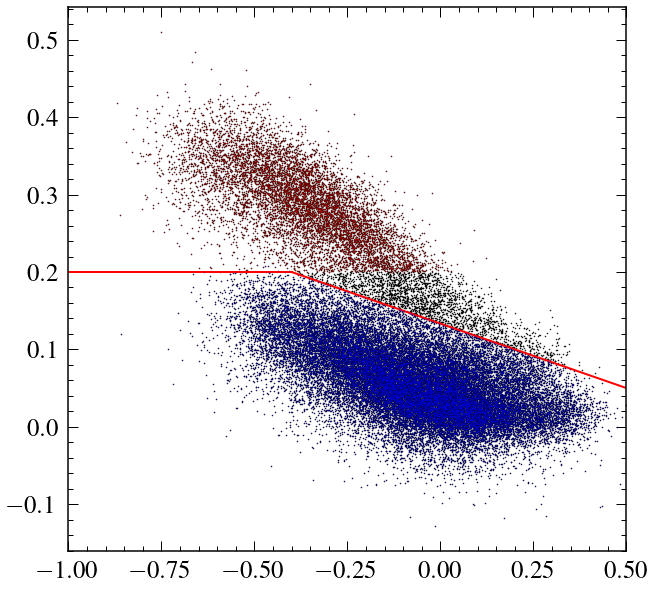

In [753]:
data = data.loc[data['[Fe/H]']>-1].reset_index(drop=True)
plt.plot(data['[Fe/H]'], data['[Mg/Fe]'], 'k.', markersize=1)
plt.plot([-2,-0.4],[0.2,0.2],'r-')
plt.plot([-0.4,0.5],[0.2,0.05],'r-')
phl = fitpoints([-0.4,0.5],[0.2,0.05])

mha = ((data['[Fe/H]']<-0.5)&(data['[Mg/Fe]']>0.2))|((data['[Fe/H]']>=-0.5)&(data['[Mg/Fe]']>phl(data['[Fe/H]'])))
mla = ~mha
mha = (data['[Mg/Fe]']>0.2)
plt.plot(data['[Fe/H]'][mha], data['[Mg/Fe]'][mha], 'r.', markersize=0.5, alpha=0.5)
plt.plot(data['[Fe/H]'][mla], data['[Mg/Fe]'][mla], 'b.', markersize=0.5, alpha=0.5)
plt.xlim([-1,0.5])


In [754]:
data['hialpha'] = mha

In [756]:
#data.to_pickle('APOGEE_DR17_loggCorrect_rb.pkl')

In [747]:
data_age = pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')

data = pd.merge(data, data_age[['APOGEE_ID','LogAge']],
               left_on='APOGEE_ID', right_on='APOGEE_ID', how='inner')
data['Age'] = np.power(10, data['LogAge'])/1000
len(data)

45786

# Load in the corrected abundances

In [757]:
from scipy.interpolate import interp1d
def getRb(age, feh, fehoffset=0):
    feh0 = pd.read_csv('/Users/yl4331/Desktop/FeHGrad/centralfeh.csv')
    slopefeh = pd.read_csv('/Users/yl4331/Desktop/FeHGrad/slopefeh.csv')
    
    func_m = interp1d(slopefeh['age'].values, 
                      slopefeh['slope'].values,
                     kind='linear')
    func_b = interp1d(feh0['age'].values, 
                      feh0['feh0'].values+fehoffset,
                     kind='linear')
    
    Rb = np.zeros(len(age))
    for i in trange(len(age)):
        try:
            m = func_m(age[i])
            b = func_b(age[i])
            Rb[i] = (feh[i]-b)/m
        except:
            Rb[i] = np.nan
    return Rb

In [749]:
data['Rb'] = getRb(data['Age'], data['[Fe/H]'], fehoffset=0.08)

100%|██████████| 45786/45786 [00:01<00:00, 26876.97it/s]


In [750]:
data = data.dropna(subset=['Rb']).reset_index(drop=True)

8.259479483108665
7.432350701269939
feh 0.03552223449155245
0.0331080634864728


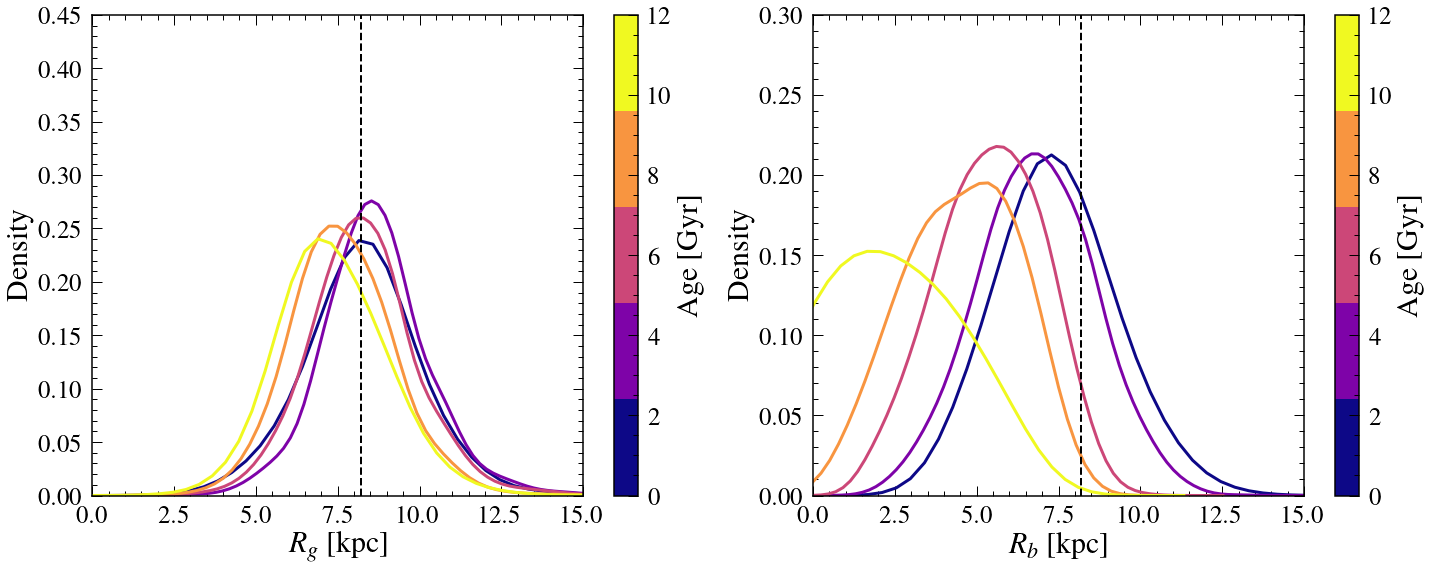

In [751]:

agebin_Rb = np.linspace(0,12,6)
agebin_colors = getcolor(range(len(agebin_Rb)-1))

from sklearn.neighbors import KernelDensity


plt.figure(figsize=(20,8))

#plt.hist(sub_tryRb['Rb'], color='k', alpha=0.2, bins=np.linspace(0,20,100))
m = abs(data['R']-8.2)<100
#m = (sub_tryRb['R']>7.7)&(sub_tryRb['R']<8.7)
#m = m&(sub_tryRb['FEH']>-1)
data_rbdis = data[m]
plt.subplot(1,2,2)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['Age']>agebin_Rb[i])&(data_rbdis['Age']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['Rg'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    m2 = (fre!=0)
    plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    #m2 = (fre_g!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre_g[m2], '--', color=agebin_colors[i], linewidth=3)
    
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.5, color='k', linestyle='--')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.3])
#plt.yscale('log')
plt.xlabel('$R_b$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')


plt.subplot(1,2,1)
for i in range(len(agebin_Rb)-1):
    sub_sing = data_rbdis.loc[(data_rbdis['Age']>agebin_Rb[i])&(data_rbdis['Age']<agebin_Rb[i+1])]
    #print(agebin_Rb[i], np.percentile(sub_sing['Rb'],95)-np.percentile(sub_sing['Rb'],5))
    #fre, edg = np.histogram(sub_sing['Rb'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    fre_g, edg_g = np.histogram(sub_sing['Rg'], bins=np.linspace(-5,20,int(np.sqrt(len(sub_sing)))), density=True)
    
    #fre = gaussian_filter(fre, 2)
    fre_g = gaussian_filter(fre_g, 2)
    
    #m2 = (fre!=0)
    #plt.plot((edg[1:]+edg[:-1])[m2]/2, fre[m2], color=agebin_colors[i], linewidth=3)
    
    m2 = (fre_g!=0)
    plt.plot((edg_g[1:]+edg_g[:-1])[m2]/2, fre_g[m2], color=agebin_colors[i], linewidth=3)
    
    if i==0:
        print(np.mean(sub_sing['Rg'].dropna()))
        print(np.mean(sub_sing['Rb'].dropna()))
        print('feh', np.mean(sub_sing['[Fe/H]']))
    #kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(sub_sing['Rb'].values.reshape(-1, 1))
    #s = np.linspace(-20,15)
    #e = kde.score_samples(s.reshape(-1,1))
    #plt.plot(s, e, color=agebin_colors[i], linewidth=3)
    
    
plt.vlines(8.2, ymin=0, ymax=0.45, color='k', linestyle='--')
plt.scatter(100,0,c=5,vmin=min(agebin_Rb),vmax=max(agebin_Rb),
           cmap=plt.get_cmap('plasma', len(agebin_Rb)-1))
#plt.plot([0,15],[0,0], 'k--')
plt.xlim([-0,15])
plt.ylim([-0,0.45])
#plt.yscale('log')
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('Density')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')

plt.tight_layout()

print(sum(data['Rb']<0)/len(data['Rb']))




"plt.figure(figsize=(10,8))\nplt.hexbin(data['Age'], data['[Fe/H]'],C=data['[Al/Fe]'],\n          cmap=plt.get_cmap('plasma', 10), vmin=0)\nplt.colorbar(label='[Al/Fe]')"

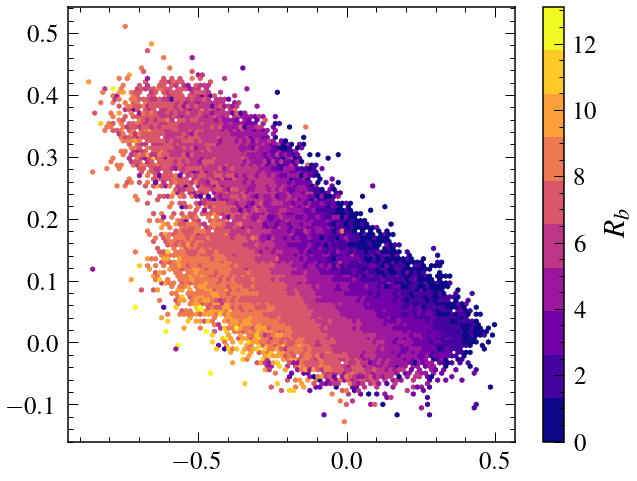

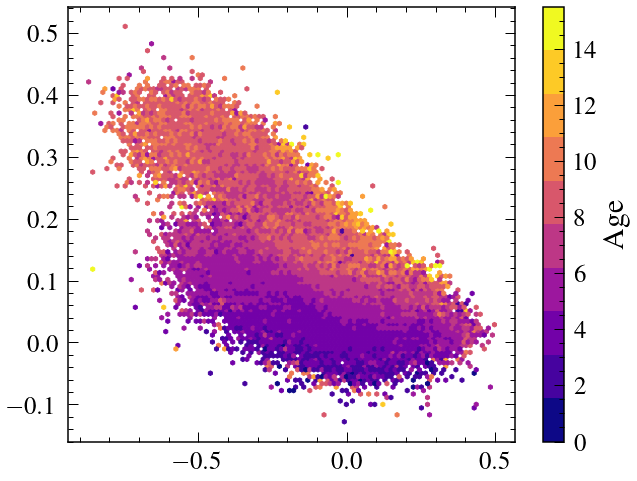

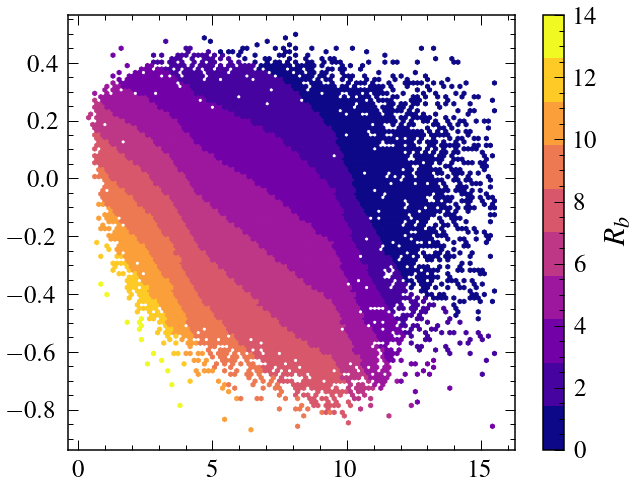

In [752]:
plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
#m = (data['Rb']<5)
#plt.plot(data['[Fe/H]'][m], data['[Mg/Fe]'][m],'r.')

plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Age'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='Age')


plt.figure(figsize=(10,8))
plt.hexbin(data['Age'], data['[Fe/H]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')


"""plt.figure(figsize=(10,8))
plt.hexbin(data['Age'], data['[Fe/H]'],C=data['[Al/Fe]'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='[Al/Fe]')"""

## only low-$\alpha$

In [ ]:
mfeh = 0
fehscale = 0.1

mla_inner = mla&(data['Rg']<7)
mla_sn = mla&(data['Rg']<8.5)&(data['Rg']>7.5)
mla_outer = mla&(data['Rg']>9.5)
print(sum(mla_inner),sum(mla_sn),sum(mla_outer))

plt.figure()
plt.hist(data['[Fe/H]'][mla_inner], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_sn], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_outer], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.vlines(mfeh, ymin=0.1, ymax=4000)
plt.yscale('log')

In [ ]:
teffcut = 4
teffcut_range = 0.5


mla_inner = mla&(data['Rg']<7)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mla_sn = mla&(data['Rg']<8.5)&(data['Rg']>7.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mla_outer = mla&(data['Rg']>9.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)
print(sum(mla_inner),sum(mla_sn),sum(mla_outer))

Nostar = min([sum(mla_inner),sum(mla_sn),sum(mla_outer)])



plt.figure()
plt.hist(data['[Fe/H]'][mla_inner], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_sn], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_outer], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.vlines(mfeh, ymin=0.1, ymax=len(mla_inner))
plt.yscale('log')
plt.xlabel('[Fe/H]')
plt.ylabel('Frequency')


plt.figure()
plt.hist(data['Age'][mla_inner], bins=np.linspace(0,15,15), alpha=0.2,
        color='blue')
plt.hist(data['Age'][mla_sn], bins=np.linspace(0,15,15), alpha=0.2,
        color='blue')
plt.hist(data['Age'][mla_outer], bins=np.linspace(0,15,15), alpha=0.2,
        color='blue')
plt.vlines(teffcut, ymin=0.1, ymax=100)
plt.xlabel('Age')
plt.ylabel('Frequency')







In [ ]:


mla_inner = mla&(data['Rg']<7)&(abs(data['[Fe/H]']-mfeh)<fehscale)&(abs(data['Age']-teffcut)<teffcut_range)
mla_sn = mla&(data['Rg']<8.5)&(data['Rg']>7.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)&(abs(data['Age']-teffcut)<teffcut_range)
mla_outer = mla&(data['Rg']>9.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)&(abs(data['Age']-teffcut)<teffcut_range)
print(sum(mla_inner),sum(mla_sn),sum(mla_outer))

Nostar = min([sum(mla_inner),sum(mla_sn),sum(mla_outer)])

import random 
ind = data[mla_inner].index
random.shuffle(list(ind))
mla_inner = ind[:Nostar]
ind = data[mla_sn].index
random.shuffle(list(ind))
mla_sn =  ind[:Nostar]
ind = data[mla_outer].index
random.shuffle(list(ind))
mla_outer = ind[:Nostar]
print(len(mla_inner),len(mla_sn),len(mla_outer))



In [ ]:
from astropy.stats import bootstrap

def samples(abun, abun_err, xs, xs_err,n,fehs_val,delta_feh):
    
    samples_abun = np.zeros((len(abun),n))
    samples_xs = np.zeros((len(abun),n))
    samples_median = np.zeros((n))
    n_samples = len(abun)
    
    # create the bootstrap samples  
    # in order to sample the distribution using bootstrap with resampling and to get the correct
    # information for every star picked, we need to sample an id array, and use that to pick out the sampled stars
    # otherwise you get incorrect fehs for every abundance
    random_ids = np.arange(len(abun))
    samples_indices = bootstrap(random_ids, n).astype(int)
      
    for indx3, k in enumerate(samples_indices):
        # find the stars with the correct id
        mask_feh = (xs[k] < delta_feh+fehs_val)&(xs[k] > fehs_val-delta_feh)
        samples_median[indx3] = np.nanmedian(abun[k][mask_feh])
    return samples_median

def find_mean_scatter_norm(abundances, abundances_err,xs,xs_err,fehs_val = -1,delta_feh=0.05,n=1000):


    abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','[K/Fe]','[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
    
    xfe_mean = np.zeros((len(abundances)))
    xfe_scatter = np.zeros((len(abundances)))
    xfe_meanerr = np.zeros((len(abundances)))
    samples_median = np.zeros((len(abundances),n))
    for indx, i in tqdm.tqdm_notebook(enumerate(abundances)):
        # make sure you are comparing stars with same logg (already did this when correcting systematics)
        # abundances compared here are between 1 < logg < 2        
        abun = i # abundances in the sample
        xs2 = xs[indx] # feh values in the sample
        abun_err = abundances_err[indx] # errors in the abundances in the sample
        xs2_err = xs_err[indx] # errors in the feh values in the sample

        # draw N samples for every x and y point, fit a line to every N distribution of the x, y plane, and get
        # the mean and sigma values of your slope and intercept
        samples_median_raw = samples(abun, abun_err, xs2, xs2_err,n,fehs_val,delta_feh)
        samples_median[indx] = samples_median_raw
        # determine the mean value of the abundances calculated by taking the mean value of the 1,000 medians
        # also calculate the sigma by taking the standard deviation of the 1,000 medians
        xfe_mean[indx] = np.nanmean(samples_median_raw)
        xfe_scatter[indx] = np.nanstd(samples_median_raw)
        xfe_meanerr[indx] = np.nanstd(samples_median_raw)/np.sqrt(len(samples_median_raw))
    return xfe_mean,xfe_scatter,xfe_meanerr



In [ ]:
#### inner low-α disk (R<6)

# Corrected abundances are saved as:
# ['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
# '[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe](17)'] 

abun_la_inn = np.array((data.iloc[mla_inner]['[O/Fe]'].values,data.iloc[mla_inner]['[Mg/Fe]'].values,data.iloc[mla_inner]['[Si/Fe]'].values,data.iloc[mla_inner]['[S/Fe]'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]'].values,data.iloc[mla_inner]['[Ti/Fe]'].values,data.iloc[mla_inner]['[C/Fe]'].values,data.iloc[mla_inner]['[N/Fe]'].values,\
                    data.iloc[mla_inner]['[Al/Fe]'].values,data.iloc[mla_inner]['[K/Fe]'].values,data.iloc[mla_inner]['[Mn/Fe]'].values,data.iloc[mla_inner]['[Ni/Fe]'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]'].values))
abun_la_inn_err = np.array((data.iloc[mla_inner]['[O/Fe]_err'].values,data.iloc[mla_inner]['[Mg/Fe]_err'],data.iloc[mla_inner]['[Si/Fe]_err'].values,data.iloc[mla_inner]['[S/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]_err'].values,data.iloc[mla_inner]['[Ti/Fe]_err'],data.iloc[mla_inner]['[C/Fe]_err'].values,data.iloc[mla_inner]['[N/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Al/Fe]_err'].values,data.iloc[mla_inner]['[K/Fe]_err'],data.iloc[mla_inner]['[Mn/Fe]_err'].values,data.iloc[mla_inner]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]_err'].values))

feh_la_inn = np.array((data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values))
feh_la_inn_err = np.array((data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values))



xfe_mean_la_inner ,xfe_scatter_la_inner ,xfe_meanerr_la_inner = find_mean_scatter_norm(abun_la_inn,abun_la_inn_err,feh_la_inn,feh_la_inn_err, fehs_val = mfeh )




In [ ]:
#### outer low-α disk (R>10)

abun_la_outer = np.array((data.iloc[mla_outer]['[O/Fe]'].values,data.iloc[mla_outer]['[Mg/Fe]'].values,data.iloc[mla_outer]['[Si/Fe]'].values,data.iloc[mla_outer]['[S/Fe]'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]'].values,data.iloc[mla_outer]['[Ti/Fe]'].values,data.iloc[mla_outer]['[C/Fe]'].values,data.iloc[mla_outer]['[N/Fe]'].values,\
                    data.iloc[mla_outer]['[Al/Fe]'].values,data.iloc[mla_outer]['[K/Fe]'].values,data.iloc[mla_outer]['[Mn/Fe]'].values,data.iloc[mla_outer]['[Ni/Fe]'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]'].values))
abun_la_outer_err = np.array((data.iloc[mla_outer]['[O/Fe]_err'].values,data.iloc[mla_outer]['[Mg/Fe]_err'].values,data.iloc[mla_outer]['[Si/Fe]_err'].values,data.iloc[mla_outer]['[S/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]_err'].values,data.iloc[mla_outer]['[Ti/Fe]_err'].values,data.iloc[mla_outer]['[C/Fe]_err'].values,data.iloc[mla_outer]['[N/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Al/Fe]_err'].values,data.iloc[mla_outer]['[K/Fe]_err'].values,data.iloc[mla_outer]['[Mn/Fe]_err'].values,data.iloc[mla_outer]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]_err'].values))

feh_la_outer = np.array((data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values))
feh_la_outer_err = np.array((data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values))

xfe_mean_la_outer ,xfe_scatter_la_outer ,xfe_meanerr_la_outer = find_mean_scatter_norm(abun_la_outer,abun_la_outer_err,feh_la_outer,feh_la_outer_err, fehs_val = mfeh )




In [ ]:
#### SN low-α disk (7<R<9)

abun_la_sn = np.array((data.iloc[mla_sn]['[O/Fe]'].values,data.iloc[mla_sn]['[Mg/Fe]'].values,data.iloc[mla_sn]['[Si/Fe]'].values,data.iloc[mla_sn]['[S/Fe]'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]'].values,data.iloc[mla_sn]['[Ti/Fe]'].values,data.iloc[mla_sn]['[C/Fe]'].values,data.iloc[mla_sn]['[N/Fe]'].values,\
                    data.iloc[mla_sn]['[Al/Fe]'].values,data.iloc[mla_sn]['[K/Fe]'].values,data.iloc[mla_sn]['[Mn/Fe]'].values,data.iloc[mla_sn]['[Ni/Fe]'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]'].values))
abun_la_sn_err = np.array((data.iloc[mla_sn]['[O/Fe]_err'].values,data.iloc[mla_sn]['[Mg/Fe]_err'],data.iloc[mla_sn]['[Si/Fe]_err'].values,data.iloc[mla_sn]['[S/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]_err'].values,data.iloc[mla_sn]['[Ti/Fe]_err'],data.iloc[mla_sn]['[C/Fe]_err'].values,data.iloc[mla_sn]['[N/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Al/Fe]_err'].values,data.iloc[mla_sn]['[K/Fe]_err'],data.iloc[mla_sn]['[Mn/Fe]_err'].values,data.iloc[mla_sn]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]_err'].values))

feh_la_sn = np.array((data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values))
feh_la_sn_err = np.array((data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values))



xfe_mean_la_sn ,xfe_scatter_la_sn ,xfe_meanerr_la_sn = find_mean_scatter_norm(abun_la_sn,abun_la_sn_err,feh_la_sn,feh_la_sn_err, fehs_val = mfeh )





In [ ]:
from scipy import stats

abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]','[N/Fe]','[Al/Fe]','[K/Fe]',\
                   '[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
                   

In [ ]:
def get_chi2(observed_mean,predicted_mean, observed_error, predicted_error):
    from scipy import stats
    
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)/(observed_error[indx]**2+predicted_error[indx]**2)
    chi2 = np.sum((result))
    return chi2

def get_diff(observed_mean,predicted_mean):
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)
    diff = np.sum((result))
    return diff

In [ ]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_inner, xfe_mean_la_outer, xfe_scatter_la_inner, xfe_scatter_la_outer)
diff = get_diff(xfe_mean_la_inner, xfe_mean_la_outer)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_outer**2+xfe_scatter_la_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_outer-xfe_mean_la_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ outer disc $-$ Low-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)




In [ ]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_inner, xfe_mean_la_sn, xfe_scatter_la_inner, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_inner, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)





In [ ]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_outer, xfe_mean_la_sn, xfe_scatter_la_outer, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_outer, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_outer**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_outer

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ outer disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)






## low-$\alpha$ Rb

In [730]:
mfeh = -0.4
fehscale = 0.1

mla_inner = mla&(data['Rb']<5)
mha_inner = mha&(data['Rb']<5)

mla_sn = mla&(data['Rb']<8.5)&(data['Rb']>7.5)
mha_sn = mha&(data['Rb']<8.5)&(data['Rb']>7.5)

mla_outer = mla&(data['Rb']>10)

print(sum(mla_inner),sum(mla_sn),
     sum(mha_inner),sum(mha_sn),sum(mla_outer))

Nostar = min(sum(mla_inner),sum(mla_sn),
     sum(mha_inner),sum(mha_sn),sum(mla_outer))

import random 
ind = data[mla_inner].index
random.shuffle(list(ind))
mla_inner = ind[:Nostar]
ind = data[mha_inner].index
random.shuffle(list(ind))
mha_inner =  ind[:Nostar]
ind = data[mla_sn].index
random.shuffle(list(ind))
mla_sn = ind[:Nostar]
ind = data[mha_sn].index
random.shuffle(list(ind))
mha_sn = ind[:Nostar]
ind = data[mla_outer].index
random.shuffle(list(ind))
mla_outer = ind[:Nostar]
print(len(mla_inner),len(mha_inner),len(mla_sn),len(mha_sn),len(mla_outer))


print('inner_LA', 'SN_LA', 'outer_LA')
print(np.mean(data['[Fe/H]'][mla_inner]), np.mean(data['[Fe/H]'][mla_sn]), np.mean(data['[Fe/H]'][mla_outer]))
print('inner_HA', 'SN_HA')
print(np.mean(data['[Fe/H]'][mha_inner]), np.mean(data['[Fe/H]'][mha_sn]))


12944 4088 2684 658 672
658 658 658 658 658
inner_LA SN_LA outer_LA
0.04174622183311604 -0.268312617761034 -0.36642811734270414
inner_HA SN_HA
-0.31096675166281496 -0.5251511048585091


Text(0.5, 1.0, 'outer low-$\\alpha$')

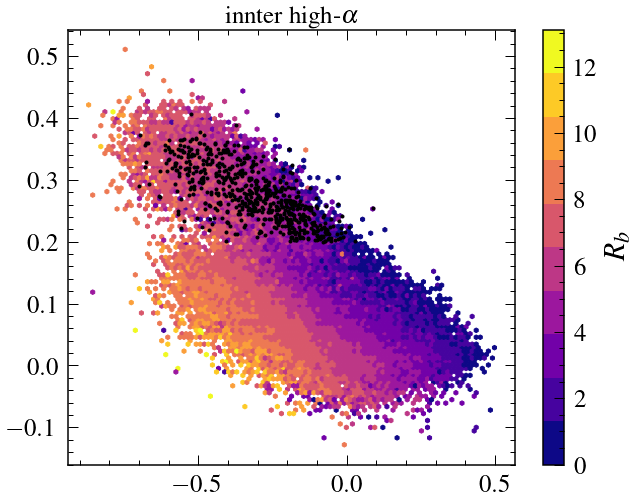

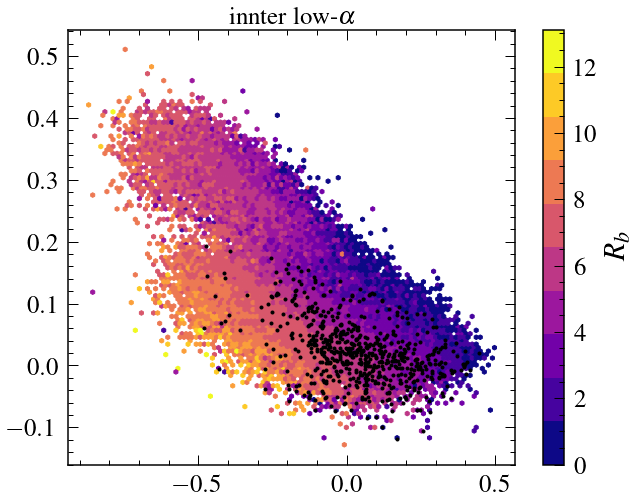

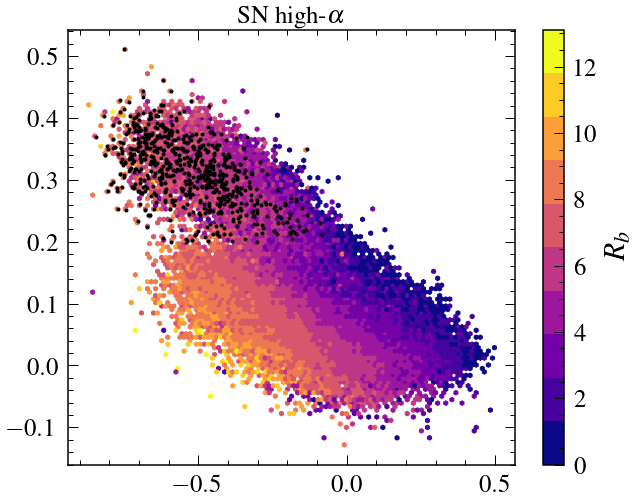

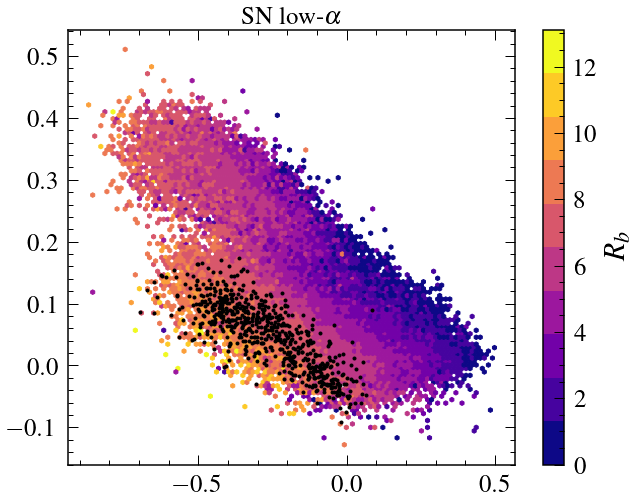

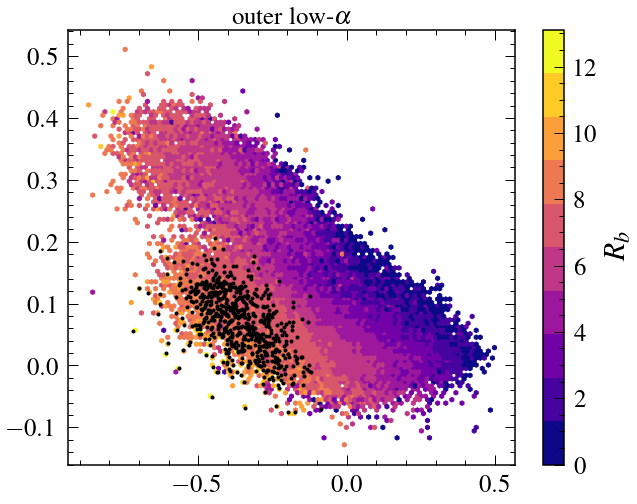

In [731]:
plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
plt.plot(data['[Fe/H]'][mha_inner], data['[Mg/Fe]'][mha_inner],'k.')
plt.title('innter high-$\\alpha$', fontsize=25)

plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
plt.plot(data['[Fe/H]'][mla_inner], data['[Mg/Fe]'][mla_inner],'k.')
plt.title('innter low-$\\alpha$', fontsize=25)

plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
plt.plot(data['[Fe/H]'][mha_sn], data['[Mg/Fe]'][mha_sn],'k.')
plt.title('SN high-$\\alpha$', fontsize=25)

plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
plt.plot(data['[Fe/H]'][mla_sn], data['[Mg/Fe]'][mla_sn],'k.')
plt.title('SN low-$\\alpha$', fontsize=25)

plt.figure(figsize=(10,8))
plt.hexbin(data['[Fe/H]'], data['[Mg/Fe]'],C=data['Rb'],
          cmap=plt.get_cmap('plasma', 10), vmin=0)
plt.colorbar(label='$R_b$')
plt.plot(data['[Fe/H]'][mla_outer], data['[Mg/Fe]'][mla_outer],'k.')
plt.title('outer low-$\\alpha$', fontsize=25)

In [732]:
print(-0.30357095903162534-(-0.008759856600658549))
print(-0.3689269478262876-(-0.008759856600658549))
print(-0.30357095903162534-(-0.038566668771541385))

print('')

print(-0.30357095903162534-(-0.3689269478262876))
print(-0.038566668771541385-(-0.008759856600658549))

-0.2948111024309668
-0.36016709122562907
-0.265004290260084

0.06535598879466226
-0.029806812170882838


In [733]:
from astropy.stats import bootstrap

def samples(abun, abun_err, xs, xs_err,n,fehs_val,delta_feh):
    
    samples_abun = np.zeros((len(abun),n))
    samples_xs = np.zeros((len(abun),n))
    samples_median = np.zeros((n))
    n_samples = len(abun)
    
    # create the bootstrap samples  
    # in order to sample the distribution using bootstrap with resampling and to get the correct
    # information for every star picked, we need to sample an id array, and use that to pick out the sampled stars
    # otherwise you get incorrect fehs for every abundance
    random_ids = np.arange(len(abun))
    samples_indices = bootstrap(random_ids, n).astype(int)
      
    for indx3, k in enumerate(samples_indices):
        # find the stars with the correct id
        mask_feh = (xs[k] < delta_feh+fehs_val)&(xs[k] > fehs_val-delta_feh)
        samples_median[indx3] = np.nanmedian(abun[k][mask_feh])
    return samples_median

def find_mean_scatter_norm(abundances, abundances_err,xs,xs_err,fehs_val = -1,delta_feh=0.05,n=1000):


    abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','[K/Fe]','[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
    
    xfe_mean = np.zeros((len(abundances)))
    xfe_scatter = np.zeros((len(abundances)))
    xfe_meanerr = np.zeros((len(abundances)))
    samples_median = np.zeros((len(abundances),n))
    for indx, i in tqdm.tqdm_notebook(enumerate(abundances)):
        # make sure you are comparing stars with same logg (already did this when correcting systematics)
        # abundances compared here are between 1 < logg < 2        
        abun = i # abundances in the sample
        xs2 = xs[indx] # feh values in the sample
        abun_err = abundances_err[indx] # errors in the abundances in the sample
        xs2_err = xs_err[indx] # errors in the feh values in the sample

        # draw N samples for every x and y point, fit a line to every N distribution of the x, y plane, and get
        # the mean and sigma values of your slope and intercept
        samples_median_raw = samples(abun, abun_err, xs2, xs2_err,n,fehs_val,delta_feh)
        samples_median[indx] = samples_median_raw
        # determine the mean value of the abundances calculated by taking the mean value of the 1,000 medians
        # also calculate the sigma by taking the standard deviation of the 1,000 medians
        xfe_mean[indx] = np.nanmean(samples_median_raw)
        xfe_scatter[indx] = np.nanstd(samples_median_raw)
        xfe_meanerr[indx] = np.nanstd(samples_median_raw)/np.sqrt(len(samples_median_raw))
    return xfe_mean,xfe_scatter,xfe_meanerr




In [734]:
#### inner low-α disk (R<6)

# Corrected abundances are saved as:
# ['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
# '[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe](17)'] 

abun_la_inn = np.array((data.iloc[mla_inner]['[O/Fe]'].values,data.iloc[mla_inner]['[Mg/Fe]'].values,data.iloc[mla_inner]['[Si/Fe]'].values,data.iloc[mla_inner]['[S/Fe]'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]'].values,data.iloc[mla_inner]['[Ti/Fe]'].values,data.iloc[mla_inner]['[C/Fe]'].values,data.iloc[mla_inner]['[N/Fe]'].values,\
                    data.iloc[mla_inner]['[Al/Fe]'].values,data.iloc[mla_inner]['[K/Fe]'].values,data.iloc[mla_inner]['[Mn/Fe]'].values,data.iloc[mla_inner]['[Ni/Fe]'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]'].values))
abun_la_inn_err = np.array((data.iloc[mla_inner]['[O/Fe]_err'].values,data.iloc[mla_inner]['[Mg/Fe]_err'],data.iloc[mla_inner]['[Si/Fe]_err'].values,data.iloc[mla_inner]['[S/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]_err'].values,data.iloc[mla_inner]['[Ti/Fe]_err'],data.iloc[mla_inner]['[C/Fe]_err'].values,data.iloc[mla_inner]['[N/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Al/Fe]_err'].values,data.iloc[mla_inner]['[K/Fe]_err'],data.iloc[mla_inner]['[Mn/Fe]_err'].values,data.iloc[mla_inner]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]_err'].values))

feh_la_inn = np.array((data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values))
feh_la_inn_err = np.array((data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values))



xfe_mean_la_inner ,xfe_scatter_la_inner ,xfe_meanerr_la_inner = find_mean_scatter_norm(abun_la_inn,abun_la_inn_err,feh_la_inn,feh_la_inn_err, fehs_val = mfeh, delta_feh=100)





0it [00:00, ?it/s]

In [735]:
#### SN low-α disk (7<R<9)

abun_la_sn = np.array((data.iloc[mla_sn]['[O/Fe]'].values,data.iloc[mla_sn]['[Mg/Fe]'].values,data.iloc[mla_sn]['[Si/Fe]'].values,data.iloc[mla_sn]['[S/Fe]'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]'].values,data.iloc[mla_sn]['[Ti/Fe]'].values,data.iloc[mla_sn]['[C/Fe]'].values,data.iloc[mla_sn]['[N/Fe]'].values,\
                    data.iloc[mla_sn]['[Al/Fe]'].values,data.iloc[mla_sn]['[K/Fe]'].values,data.iloc[mla_sn]['[Mn/Fe]'].values,data.iloc[mla_sn]['[Ni/Fe]'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]'].values))
abun_la_sn_err = np.array((data.iloc[mla_sn]['[O/Fe]_err'].values,data.iloc[mla_sn]['[Mg/Fe]_err'],data.iloc[mla_sn]['[Si/Fe]_err'].values,data.iloc[mla_sn]['[S/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]_err'].values,data.iloc[mla_sn]['[Ti/Fe]_err'],data.iloc[mla_sn]['[C/Fe]_err'].values,data.iloc[mla_sn]['[N/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Al/Fe]_err'].values,data.iloc[mla_sn]['[K/Fe]_err'],data.iloc[mla_sn]['[Mn/Fe]_err'].values,data.iloc[mla_sn]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]_err'].values))

feh_la_sn = np.array((data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values))
feh_la_sn_err = np.array((data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values))



xfe_mean_la_sn ,xfe_scatter_la_sn ,xfe_meanerr_la_sn = find_mean_scatter_norm(abun_la_sn,abun_la_sn_err,feh_la_sn,feh_la_sn_err, fehs_val = mfeh, delta_feh=100)






0it [00:00, ?it/s]

In [736]:
#### outer low-α disk (R>10)

abun_la_outer = np.array((data.iloc[mla_outer]['[O/Fe]'].values,data.iloc[mla_outer]['[Mg/Fe]'].values,data.iloc[mla_outer]['[Si/Fe]'].values,data.iloc[mla_outer]['[S/Fe]'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]'].values,data.iloc[mla_outer]['[Ti/Fe]'].values,data.iloc[mla_outer]['[C/Fe]'].values,data.iloc[mla_outer]['[N/Fe]'].values,\
                    data.iloc[mla_outer]['[Al/Fe]'].values,data.iloc[mla_outer]['[K/Fe]'].values,data.iloc[mla_outer]['[Mn/Fe]'].values,data.iloc[mla_outer]['[Ni/Fe]'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]'].values))
abun_la_outer_err = np.array((data.iloc[mla_outer]['[O/Fe]_err'].values,data.iloc[mla_outer]['[Mg/Fe]_err'].values,data.iloc[mla_outer]['[Si/Fe]_err'].values,data.iloc[mla_outer]['[S/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]_err'].values,data.iloc[mla_outer]['[Ti/Fe]_err'].values,data.iloc[mla_outer]['[C/Fe]_err'].values,data.iloc[mla_outer]['[N/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Al/Fe]_err'].values,data.iloc[mla_outer]['[K/Fe]_err'].values,data.iloc[mla_outer]['[Mn/Fe]_err'].values,data.iloc[mla_outer]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]_err'].values))

feh_la_outer = np.array((data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values))
feh_la_outer_err = np.array((data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values))

xfe_mean_la_outer ,xfe_scatter_la_outer ,xfe_meanerr_la_outer = find_mean_scatter_norm(abun_la_outer,abun_la_outer_err,feh_la_outer,feh_la_outer_err, fehs_val = mfeh, delta_feh=100)




0it [00:00, ?it/s]

In [737]:
#### inner high-α disk (R<6)

# Corrected abundances are saved as:
# ['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
# '[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe](17)'] 

abun_ha_inn = np.array((data.iloc[mha_inner]['[O/Fe]'].values,data.iloc[mha_inner]['[Mg/Fe]'].values,data.iloc[mha_inner]['[Si/Fe]'].values,data.iloc[mha_inner]['[S/Fe]'].values,\
                    data.iloc[mha_inner]['[Ca/Fe]'].values,data.iloc[mha_inner]['[Ti/Fe]'].values,data.iloc[mha_inner]['[C/Fe]'].values,data.iloc[mha_inner]['[N/Fe]'].values,\
                    data.iloc[mha_inner]['[Al/Fe]'].values,data.iloc[mha_inner]['[K/Fe]'].values,data.iloc[mha_inner]['[Mn/Fe]'].values,data.iloc[mha_inner]['[Ni/Fe]'].values,\
                    data.iloc[mha_inner]['[Ce/Fe]'].values))
abun_ha_inn_err = np.array((data.iloc[mha_inner]['[O/Fe]_err'].values,data.iloc[mha_inner]['[Mg/Fe]_err'],data.iloc[mha_inner]['[Si/Fe]_err'].values,data.iloc[mha_inner]['[S/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Ca/Fe]_err'].values,data.iloc[mha_inner]['[Ti/Fe]_err'],data.iloc[mha_inner]['[C/Fe]_err'].values,data.iloc[mha_inner]['[N/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Al/Fe]_err'].values,data.iloc[mha_inner]['[K/Fe]_err'],data.iloc[mha_inner]['[Mn/Fe]_err'].values,data.iloc[mha_inner]['[Ni/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Ce/Fe]_err'].values))

feh_ha_inn = np.array((data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values))
feh_ha_inn_err = np.array((data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values))



xfe_mean_ha_inner ,xfe_scatter_ha_inner ,xfe_meanerr_ha_inner = find_mean_scatter_norm(abun_ha_inn,abun_ha_inn_err,feh_ha_inn,feh_ha_inn_err, fehs_val = mfeh, delta_feh=100)



0it [00:00, ?it/s]

In [738]:
#### SN high-α disk (7<R<9)

abun_ha_sn = np.array((data.iloc[mha_sn]['[O/Fe]'].values,data.iloc[mha_sn]['[Mg/Fe]'].values,data.iloc[mha_sn]['[Si/Fe]'].values,data.iloc[mha_sn]['[S/Fe]'].values,\
                    data.iloc[mha_sn]['[Ca/Fe]'].values,data.iloc[mha_sn]['[Ti/Fe]'].values,data.iloc[mha_sn]['[C/Fe]'].values,data.iloc[mha_sn]['[N/Fe]'].values,\
                    data.iloc[mha_sn]['[Al/Fe]'].values,data.iloc[mha_sn]['[K/Fe]'].values,data.iloc[mha_sn]['[Mn/Fe]'].values,data.iloc[mha_sn]['[Ni/Fe]'].values,\
                    data.iloc[mha_sn]['[Ce/Fe]'].values))
abun_ha_sn_err = np.array((data.iloc[mha_sn]['[O/Fe]_err'].values,data.iloc[mha_sn]['[Mg/Fe]_err'],data.iloc[mha_sn]['[Si/Fe]_err'].values,data.iloc[mha_sn]['[S/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Ca/Fe]_err'].values,data.iloc[mha_sn]['[Ti/Fe]_err'],data.iloc[mha_sn]['[C/Fe]_err'].values,data.iloc[mha_sn]['[N/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Al/Fe]_err'].values,data.iloc[mha_sn]['[K/Fe]_err'],data.iloc[mha_sn]['[Mn/Fe]_err'].values,data.iloc[mha_sn]['[Ni/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Ce/Fe]_err'].values))

feh_ha_sn = np.array((data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values))
feh_ha_sn_err = np.array((data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values))



xfe_mean_ha_sn ,xfe_scatter_ha_sn ,xfe_meanerr_ha_sn = find_mean_scatter_norm(abun_ha_sn,abun_ha_sn_err,feh_ha_sn,feh_ha_sn_err, fehs_val = mfeh, delta_feh=100)




0it [00:00, ?it/s]

Text(11.4, -0.5, '$s$-process')

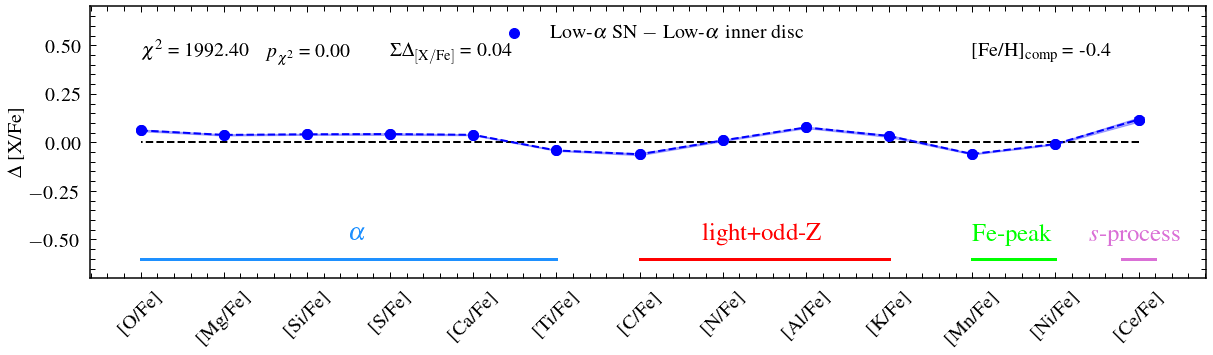

In [739]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_inner, xfe_mean_la_sn, xfe_scatter_la_inner, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_inner, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)






Text(11.4, -0.5, '$s$-process')

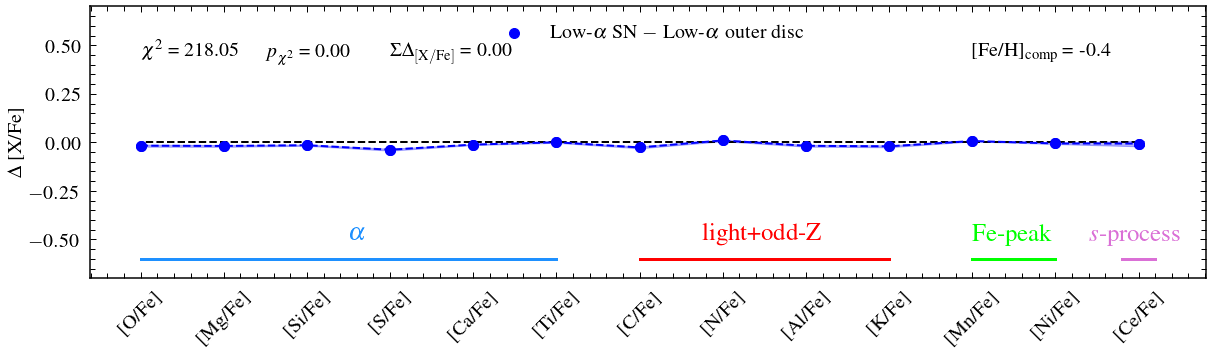

In [740]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_outer, xfe_mean_la_sn, xfe_scatter_la_outer, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_outer, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_outer**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_outer

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ outer disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)







Text(11.4, -0.5, '$s$-process')

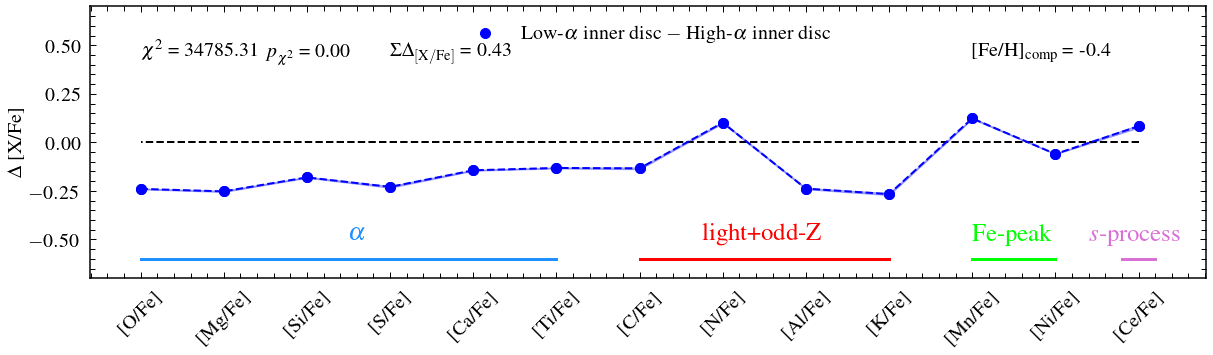

In [741]:
# inner high-α vs inner low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_la_inner, xfe_scatter_ha_inner, xfe_scatter_la_inner)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_la_inner)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_inner**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_inner-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ inner disc $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)




Text(11.4, -0.5, '$s$-process')

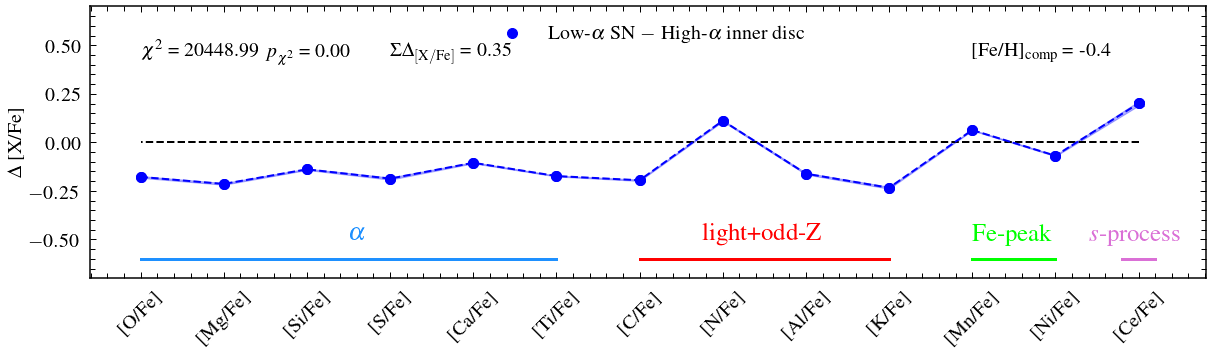

In [742]:
# inner high-α vs sn low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_la_sn, xfe_scatter_ha_inner, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)





Text(11.4, -0.5, '$s$-process')

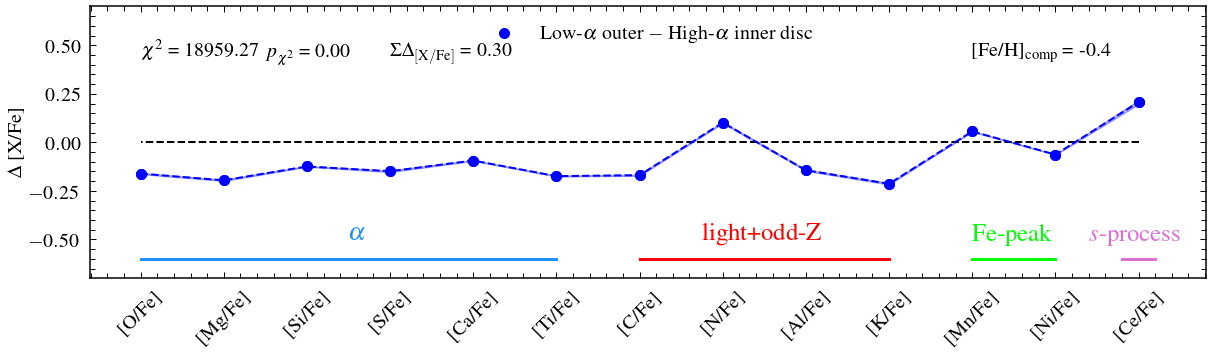

In [743]:
# inner high-α vs sn low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_la_outer, xfe_scatter_ha_inner, xfe_scatter_la_outer)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_la_outer)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_outer**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_outer-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ outer $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)






## low- and high-

7390 9482 735
4936 21197 11545


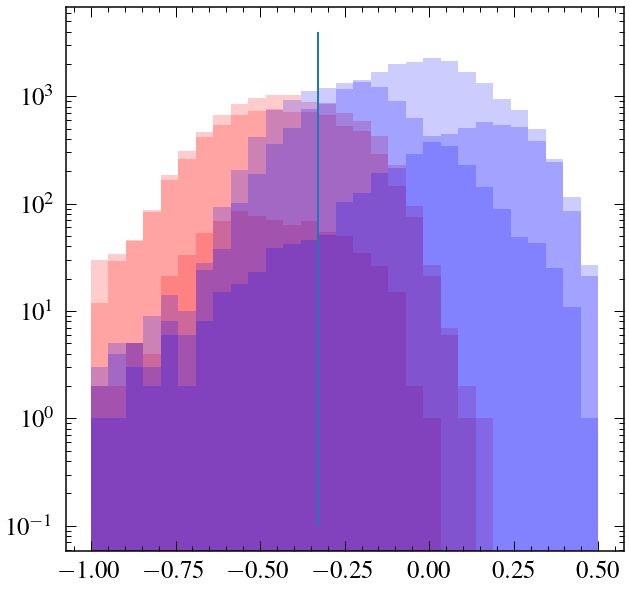

In [248]:
mfeh = -0.33
fehscale = 0.1

mha_inner = mha&(data['Rg']<6)
mha_sn = mha&(data['Rg']<8.5)&(data['R']>7.5)
mha_outer = mha&(data['Rg']>10)
print(sum(mha_inner),sum(mha_sn),sum(mha_outer))

mla_inner = mla&(data['Rg']<6)
mla_sn = mla&(data['Rg']<8.5)&(data['R']>7.5)
mla_outer = mla&(data['Rg']>10)
print(sum(mla_inner),sum(mla_sn),sum(mla_outer))

plt.figure()
plt.hist(data['[Fe/H]'][mha_inner], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='red')
plt.hist(data['[Fe/H]'][mha_sn], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='red')
plt.hist(data['[Fe/H]'][mha_outer], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='red')

plt.hist(data['[Fe/H]'][mla_inner], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_sn], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_outer], bins=np.linspace(-1,0.5,30), alpha=0.2,
        color='blue')
plt.vlines(mfeh, ymin=0.1, ymax=4000)
plt.yscale('log')

In [277]:
mha_inner = mha&(data['Rg']<6)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mha_sn = mha&(data['Rg']<8.5)&(data['Rg']>7.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mha_outer = mha&(data['Rg']>10)&(abs(data['[Fe/H]']-mfeh)<fehscale)
print(sum(mha_inner),sum(mha_sn),sum(mha_outer))

mla_inner = mla&(data['Rg']<6)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mla_sn = mla&(data['Rg']<8.5)&(data['Rg']>7.5)&(abs(data['[Fe/H]']-mfeh)<fehscale)
mla_outer = mla&(data['Rg']>10)&(abs(data['[Fe/H]']-mfeh)<fehscale)
print(sum(mla_inner),sum(mla_sn),sum(mla_outer))

Nostar = min([sum(mha_inner),sum(mha_sn),sum(mha_outer),
              sum(mla_inner),sum(mla_sn),sum(mla_outer)])

import random 
ind = data[mha_inner].index
random.shuffle(list(ind))
mha_inner = ind[:Nostar]
ind = data[mha_sn].index
random.shuffle(list(ind))
mha_sn =  ind[:Nostar]
ind = data[mha_outer].index
random.shuffle(list(ind))
mha_outer = ind[:Nostar]
print(len(mha_inner),len(mha_sn),len(mha_outer))

ind = data[mla_inner].index
random.shuffle(list(ind))
mla_inner = ind[:Nostar]
ind = data[mla_sn].index
random.shuffle(list(ind))
mla_sn =  ind[:Nostar]
ind = data[mla_outer].index
random.shuffle(list(ind))
mla_outer = ind[:Nostar]
print(len(mla_inner),len(mla_sn),len(mla_outer))

2558 1271 224
231 2652 4373
224 224 224
224 224 224


Text(0, 0.5, 'Frequency')

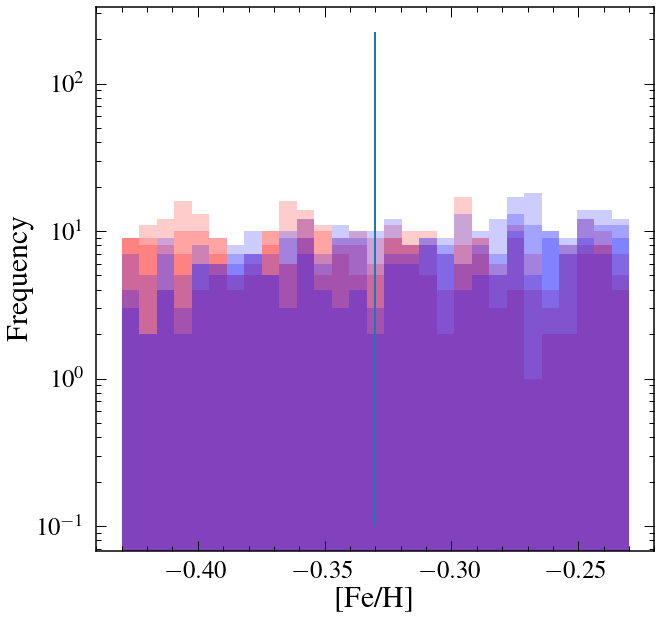

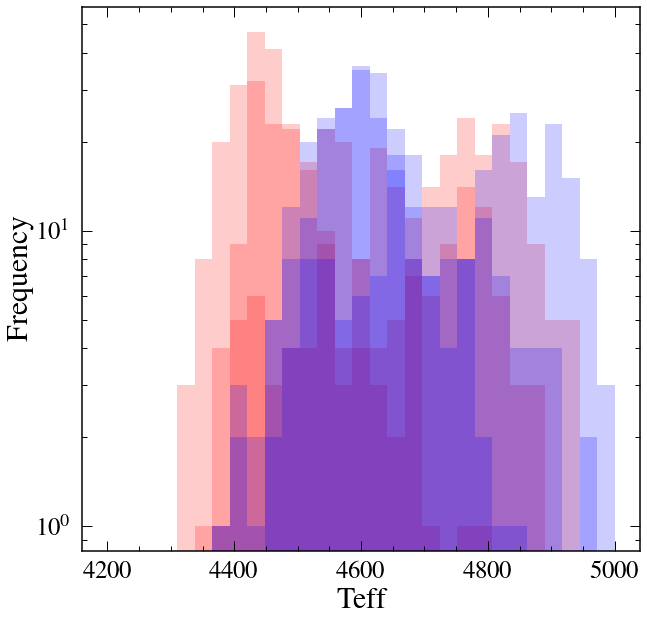

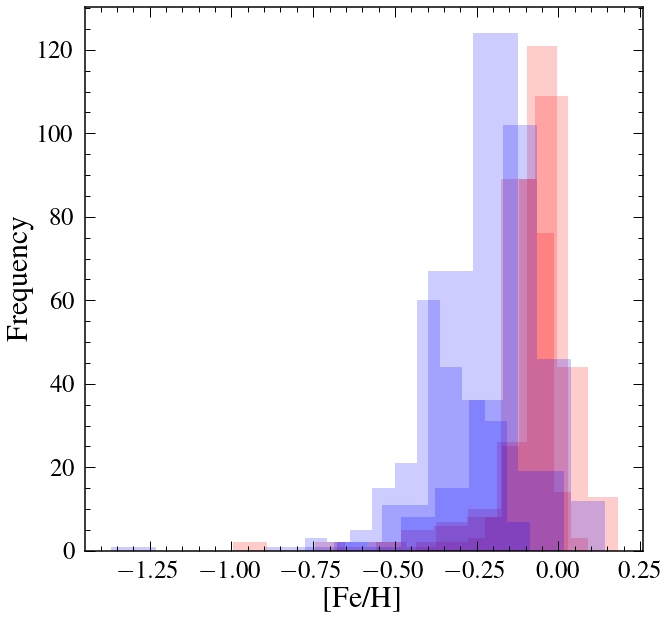

In [283]:
plt.figure()
plt.hist(data['[Fe/H]'][mha_inner], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='red')
plt.hist(data['[Fe/H]'][mha_sn], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='red')
plt.hist(data['[Fe/H]'][mha_outer], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='red')

plt.hist(data['[Fe/H]'][mla_inner], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_sn], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.hist(data['[Fe/H]'][mla_outer], bins=np.linspace(mfeh-fehscale,mfeh+fehscale,30), alpha=0.2,
        color='blue')
plt.vlines(mfeh, ymin=0.1, ymax=len(mla_inner))
plt.yscale('log')
plt.xlabel('[Fe/H]')
plt.ylabel('Frequency')


plt.figure()
plt.hist(data['teff'][mha_inner], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='red')
plt.hist(data['teff'][mha_sn], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='red')
plt.hist(data['teff'][mha_outer], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='red')

plt.hist(data['teff'][mla_inner], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='blue')
plt.hist(data['teff'][mla_sn], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='blue')
plt.hist(data['teff'][mla_outer], bins=np.linspace(4200,5000,30), alpha=0.2,
        color='blue')
#plt.vlines(-0.2, ymin=0.1, ymax=len(mla_inner))
plt.yscale('log')
plt.xlabel('Teff')
plt.ylabel('Frequency')


data['[C/N]'] = data['[C/Fe]']-data['[N/Fe]']
plt.figure()
plt.hist(data['[C/N]'][mha_inner], alpha=0.2,
        color='red')
plt.hist(data['[C/N]'][mha_sn], alpha=0.2,
        color='red')
plt.hist(data['[C/N]'][mha_outer], alpha=0.2,
        color='red')

plt.hist(data['[C/N]'][mla_inner], alpha=0.2,
        color='blue')
plt.hist(data['[C/N]'][mla_sn], alpha=0.2,
        color='blue')
plt.hist(data['[C/N]'][mla_outer], alpha=0.2,
        color='blue')
#plt.vlines(mfeh, ymin=0.1, ymax=len(mla_inner))
#plt.yscale('log')
plt.xlabel('[Fe/H]')
plt.ylabel('Frequency')


Corrected abundances are saved as:

['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
'[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe]'(17)] 


In [284]:
from astropy.stats import bootstrap

def samples(abun, abun_err, xs, xs_err,n,fehs_val,delta_feh):
    
    samples_abun = np.zeros((len(abun),n))
    samples_xs = np.zeros((len(abun),n))
    samples_median = np.zeros((n))
    n_samples = len(abun)
    
    # create the bootstrap samples  
    # in order to sample the distribution using bootstrap with resampling and to get the correct
    # information for every star picked, we need to sample an id array, and use that to pick out the sampled stars
    # otherwise you get incorrect fehs for every abundance
    random_ids = np.arange(len(abun))
    samples_indices = bootstrap(random_ids, n).astype(int)
      
    for indx3, k in enumerate(samples_indices):
        # find the stars with the correct id
        mask_feh = (xs[k] < delta_feh+fehs_val)&(xs[k] > fehs_val-delta_feh)
        samples_median[indx3] = np.nanmedian(abun[k][mask_feh])
    return samples_median

def find_mean_scatter_norm(abundances, abundances_err,xs,xs_err,fehs_val = -1,delta_feh=0.05,n=1000):


    abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]',\
                       '[N/Fe]','[Al/Fe]','[K/Fe]','[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
    
    xfe_mean = np.zeros((len(abundances)))
    xfe_scatter = np.zeros((len(abundances)))
    xfe_meanerr = np.zeros((len(abundances)))
    samples_median = np.zeros((len(abundances),n))
    for indx, i in tqdm.tqdm_notebook(enumerate(abundances)):
        # make sure you are comparing stars with same logg (already did this when correcting systematics)
        # abundances compared here are between 1 < logg < 2        
        abun = i # abundances in the sample
        xs2 = xs[indx] # feh values in the sample
        abun_err = abundances_err[indx] # errors in the abundances in the sample
        xs2_err = xs_err[indx] # errors in the feh values in the sample

        # draw N samples for every x and y point, fit a line to every N distribution of the x, y plane, and get
        # the mean and sigma values of your slope and intercept
        samples_median_raw = samples(abun, abun_err, xs2, xs2_err,n,fehs_val,delta_feh)
        samples_median[indx] = samples_median_raw
        # determine the mean value of the abundances calculated by taking the mean value of the 1,000 medians
        # also calculate the sigma by taking the standard deviation of the 1,000 medians
        xfe_mean[indx] = np.nanmean(samples_median_raw)
        xfe_scatter[indx] = np.nanstd(samples_median_raw)
        xfe_meanerr[indx] = np.nanstd(samples_median_raw)/np.sqrt(len(samples_median_raw))
    return xfe_mean,xfe_scatter,xfe_meanerr


In [285]:
#### inner high-α disk (R<6)

# Corrected abundances are saved as:
# ['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
# '[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe](17)'] 

abun_ha_inn = np.array((data.iloc[mha_inner]['[O/Fe]'].values,data.iloc[mha_inner]['[Mg/Fe]'].values,data.iloc[mha_inner]['[Si/Fe]'].values,data.iloc[mha_inner]['[S/Fe]'].values,\
                    data.iloc[mha_inner]['[Ca/Fe]'].values,data.iloc[mha_inner]['[Ti/Fe]'].values,data.iloc[mha_inner]['[C/Fe]'].values,data.iloc[mha_inner]['[N/Fe]'].values,\
                    data.iloc[mha_inner]['[Al/Fe]'].values,data.iloc[mha_inner]['[K/Fe]'].values,data.iloc[mha_inner]['[Mn/Fe]'].values,data.iloc[mha_inner]['[Ni/Fe]'].values,\
                    data.iloc[mha_inner]['[Ce/Fe]'].values))
abun_ha_inn_err = np.array((data.iloc[mha_inner]['[O/Fe]_err'].values,data.iloc[mha_inner]['[Mg/Fe]_err'],data.iloc[mha_inner]['[Si/Fe]_err'].values,data.iloc[mha_inner]['[S/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Ca/Fe]_err'].values,data.iloc[mha_inner]['[Ti/Fe]_err'],data.iloc[mha_inner]['[C/Fe]_err'].values,data.iloc[mha_inner]['[N/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Al/Fe]_err'].values,data.iloc[mha_inner]['[K/Fe]_err'],data.iloc[mha_inner]['[Mn/Fe]_err'].values,data.iloc[mha_inner]['[Ni/Fe]_err'].values,\
                    data.iloc[mha_inner]['[Ce/Fe]_err'].values))

feh_ha_inn = np.array((data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,data.iloc[mha_inner]['[Fe/H]'].values,\
                    data.iloc[mha_inner]['[Fe/H]'].values))
feh_ha_inn_err = np.array((data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'],data.iloc[mha_inner]['[Fe/H]_err'].values,data.iloc[mha_inner]['[Fe/H]_err'].values,\
                    data.iloc[mha_inner]['[Fe/H]_err'].values))



xfe_mean_ha_inner ,xfe_scatter_ha_inner ,xfe_meanerr_ha_inner = find_mean_scatter_norm(abun_ha_inn,abun_ha_inn_err,feh_ha_inn,feh_ha_inn_err, fehs_val = mfeh )


0it [00:00, ?it/s]

In [286]:
#### outer high-α disk (R>10)

abun_ha_outer = np.array((data.iloc[mha_outer]['[O/Fe]'].values,data.iloc[mha_outer]['[Mg/Fe]'].values,data.iloc[mha_outer]['[Si/Fe]'].values,data.iloc[mha_outer]['[S/Fe]'].values,\
                    data.iloc[mha_outer]['[Ca/Fe]'].values,data.iloc[mha_outer]['[Ti/Fe]'].values,data.iloc[mha_outer]['[C/Fe]'].values,data.iloc[mha_outer]['[N/Fe]'].values,\
                    data.iloc[mha_outer]['[Al/Fe]'].values,data.iloc[mha_outer]['[K/Fe]'].values,data.iloc[mha_outer]['[Mn/Fe]'].values,data.iloc[mha_outer]['[Ni/Fe]'].values,\
                    data.iloc[mha_outer]['[Ce/Fe]'].values))
abun_ha_outer_err = np.array((data.iloc[mha_outer]['[O/Fe]_err'].values,data.iloc[mha_outer]['[Mg/Fe]_err'].values,data.iloc[mha_outer]['[Si/Fe]_err'].values,data.iloc[mha_outer]['[S/Fe]_err'].values,\
                    data.iloc[mha_outer]['[Ca/Fe]_err'].values,data.iloc[mha_outer]['[Ti/Fe]_err'].values,data.iloc[mha_outer]['[C/Fe]_err'].values,data.iloc[mha_outer]['[N/Fe]_err'].values,\
                    data.iloc[mha_outer]['[Al/Fe]_err'].values,data.iloc[mha_outer]['[K/Fe]_err'].values,data.iloc[mha_outer]['[Mn/Fe]_err'].values,data.iloc[mha_outer]['[Ni/Fe]_err'].values,\
                    data.iloc[mha_outer]['[Ce/Fe]_err'].values))

feh_ha_outer = np.array((data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,\
                    data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,\
                    data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,data.iloc[mha_outer]['[Fe/H]'].values,\
                    data.iloc[mha_outer]['[Fe/H]'].values))
feh_ha_outer_err = np.array((data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,\
                    data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,\
                    data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,data.iloc[mha_outer]['[Fe/H]_err'].values,\
                    data.iloc[mha_outer]['[Fe/H]_err'].values))

xfe_mean_ha_outer ,xfe_scatter_ha_outer ,xfe_meanerr_ha_outer = find_mean_scatter_norm(abun_ha_outer,abun_ha_outer_err,feh_ha_outer,feh_ha_outer_err, fehs_val = mfeh )


0it [00:00, ?it/s]

In [287]:
#### SN high-α disk (7<R<9)

abun_ha_sn = np.array((data.iloc[mha_sn]['[O/Fe]'].values,data.iloc[mha_sn]['[Mg/Fe]'].values,data.iloc[mha_sn]['[Si/Fe]'].values,data.iloc[mha_sn]['[S/Fe]'].values,\
                    data.iloc[mha_sn]['[Ca/Fe]'].values,data.iloc[mha_sn]['[Ti/Fe]'].values,data.iloc[mha_sn]['[C/Fe]'].values,data.iloc[mha_sn]['[N/Fe]'].values,\
                    data.iloc[mha_sn]['[Al/Fe]'].values,data.iloc[mha_sn]['[K/Fe]'].values,data.iloc[mha_sn]['[Mn/Fe]'].values,data.iloc[mha_sn]['[Ni/Fe]'].values,\
                    data.iloc[mha_sn]['[Ce/Fe]'].values))
abun_ha_sn_err = np.array((data.iloc[mha_sn]['[O/Fe]_err'].values,data.iloc[mha_sn]['[Mg/Fe]_err'],data.iloc[mha_sn]['[Si/Fe]_err'].values,data.iloc[mha_sn]['[S/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Ca/Fe]_err'].values,data.iloc[mha_sn]['[Ti/Fe]_err'],data.iloc[mha_sn]['[C/Fe]_err'].values,data.iloc[mha_sn]['[N/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Al/Fe]_err'].values,data.iloc[mha_sn]['[K/Fe]_err'],data.iloc[mha_sn]['[Mn/Fe]_err'].values,data.iloc[mha_sn]['[Ni/Fe]_err'].values,\
                    data.iloc[mha_sn]['[Ce/Fe]_err'].values))

feh_ha_sn = np.array((data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,data.iloc[mha_sn]['[Fe/H]'].values,\
                    data.iloc[mha_sn]['[Fe/H]'].values))
feh_ha_sn_err = np.array((data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'],data.iloc[mha_sn]['[Fe/H]_err'].values,data.iloc[mha_sn]['[Fe/H]_err'].values,\
                    data.iloc[mha_sn]['[Fe/H]_err'].values))



xfe_mean_ha_sn ,xfe_scatter_ha_sn ,xfe_meanerr_ha_sn = find_mean_scatter_norm(abun_ha_sn,abun_ha_sn_err,feh_ha_sn,feh_ha_sn_err, fehs_val = mfeh )



0it [00:00, ?it/s]

In [288]:
#### inner low-α disk (R<6)

# Corrected abundances are saved as:
# ['[C/Fe]'(0),'[N/Fe]'(1),'[O/Fe]'(2),'[Na/Fe]'(3),'[Mg/Fe]'(4),'[Al/Fe]'(5),'[Si/Fe]'(6),'[S/Fe]'(7),'[K/Fe]'(8),\
# '[Ca/Fe]'(9),'[Ti/Fe]'(10),'[V/Fe]'(11),'[Cr/Fe]'(12),'[Mn/Fe]'(13),'[Fe/H]'(14),'[Co/Fe]'(15),'[Ni/Fe]'(16),'[Ce/Fe](17)'] 

abun_la_inn = np.array((data.iloc[mla_inner]['[O/Fe]'].values,data.iloc[mla_inner]['[Mg/Fe]'].values,data.iloc[mla_inner]['[Si/Fe]'].values,data.iloc[mla_inner]['[S/Fe]'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]'].values,data.iloc[mla_inner]['[Ti/Fe]'].values,data.iloc[mla_inner]['[C/Fe]'].values,data.iloc[mla_inner]['[N/Fe]'].values,\
                    data.iloc[mla_inner]['[Al/Fe]'].values,data.iloc[mla_inner]['[K/Fe]'].values,data.iloc[mla_inner]['[Mn/Fe]'].values,data.iloc[mla_inner]['[Ni/Fe]'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]'].values))
abun_la_inn_err = np.array((data.iloc[mla_inner]['[O/Fe]_err'].values,data.iloc[mla_inner]['[Mg/Fe]_err'],data.iloc[mla_inner]['[Si/Fe]_err'].values,data.iloc[mla_inner]['[S/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ca/Fe]_err'].values,data.iloc[mla_inner]['[Ti/Fe]_err'],data.iloc[mla_inner]['[C/Fe]_err'].values,data.iloc[mla_inner]['[N/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Al/Fe]_err'].values,data.iloc[mla_inner]['[K/Fe]_err'],data.iloc[mla_inner]['[Mn/Fe]_err'].values,data.iloc[mla_inner]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_inner]['[Ce/Fe]_err'].values))

feh_la_inn = np.array((data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,data.iloc[mla_inner]['[Fe/H]'].values,\
                    data.iloc[mla_inner]['[Fe/H]'].values))
feh_la_inn_err = np.array((data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'],data.iloc[mla_inner]['[Fe/H]_err'].values,data.iloc[mla_inner]['[Fe/H]_err'].values,\
                    data.iloc[mla_inner]['[Fe/H]_err'].values))



xfe_mean_la_inner ,xfe_scatter_la_inner ,xfe_meanerr_la_inner = find_mean_scatter_norm(abun_la_inn,abun_la_inn_err,feh_la_inn,feh_la_inn_err, fehs_val = mfeh )



0it [00:00, ?it/s]

In [289]:
#### outer low-α disk (R>10)

abun_la_outer = np.array((data.iloc[mla_outer]['[O/Fe]'].values,data.iloc[mla_outer]['[Mg/Fe]'].values,data.iloc[mla_outer]['[Si/Fe]'].values,data.iloc[mla_outer]['[S/Fe]'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]'].values,data.iloc[mla_outer]['[Ti/Fe]'].values,data.iloc[mla_outer]['[C/Fe]'].values,data.iloc[mla_outer]['[N/Fe]'].values,\
                    data.iloc[mla_outer]['[Al/Fe]'].values,data.iloc[mla_outer]['[K/Fe]'].values,data.iloc[mla_outer]['[Mn/Fe]'].values,data.iloc[mla_outer]['[Ni/Fe]'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]'].values))
abun_la_outer_err = np.array((data.iloc[mla_outer]['[O/Fe]_err'].values,data.iloc[mla_outer]['[Mg/Fe]_err'].values,data.iloc[mla_outer]['[Si/Fe]_err'].values,data.iloc[mla_outer]['[S/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ca/Fe]_err'].values,data.iloc[mla_outer]['[Ti/Fe]_err'].values,data.iloc[mla_outer]['[C/Fe]_err'].values,data.iloc[mla_outer]['[N/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Al/Fe]_err'].values,data.iloc[mla_outer]['[K/Fe]_err'].values,data.iloc[mla_outer]['[Mn/Fe]_err'].values,data.iloc[mla_outer]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_outer]['[Ce/Fe]_err'].values))

feh_la_outer = np.array((data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,data.iloc[mla_outer]['[Fe/H]'].values,\
                    data.iloc[mla_outer]['[Fe/H]'].values))
feh_la_outer_err = np.array((data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,data.iloc[mla_outer]['[Fe/H]_err'].values,\
                    data.iloc[mla_outer]['[Fe/H]_err'].values))

xfe_mean_la_outer ,xfe_scatter_la_outer ,xfe_meanerr_la_outer = find_mean_scatter_norm(abun_la_outer,abun_la_outer_err,feh_la_outer,feh_la_outer_err, fehs_val = mfeh )



0it [00:00, ?it/s]

In [290]:
#### SN low-α disk (7<R<9)

abun_la_sn = np.array((data.iloc[mla_sn]['[O/Fe]'].values,data.iloc[mla_sn]['[Mg/Fe]'].values,data.iloc[mla_sn]['[Si/Fe]'].values,data.iloc[mla_sn]['[S/Fe]'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]'].values,data.iloc[mla_sn]['[Ti/Fe]'].values,data.iloc[mla_sn]['[C/Fe]'].values,data.iloc[mla_sn]['[N/Fe]'].values,\
                    data.iloc[mla_sn]['[Al/Fe]'].values,data.iloc[mla_sn]['[K/Fe]'].values,data.iloc[mla_sn]['[Mn/Fe]'].values,data.iloc[mla_sn]['[Ni/Fe]'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]'].values))
abun_la_sn_err = np.array((data.iloc[mla_sn]['[O/Fe]_err'].values,data.iloc[mla_sn]['[Mg/Fe]_err'],data.iloc[mla_sn]['[Si/Fe]_err'].values,data.iloc[mla_sn]['[S/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ca/Fe]_err'].values,data.iloc[mla_sn]['[Ti/Fe]_err'],data.iloc[mla_sn]['[C/Fe]_err'].values,data.iloc[mla_sn]['[N/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Al/Fe]_err'].values,data.iloc[mla_sn]['[K/Fe]_err'],data.iloc[mla_sn]['[Mn/Fe]_err'].values,data.iloc[mla_sn]['[Ni/Fe]_err'].values,\
                    data.iloc[mla_sn]['[Ce/Fe]_err'].values))

feh_la_sn = np.array((data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,data.iloc[mla_sn]['[Fe/H]'].values,\
                    data.iloc[mla_sn]['[Fe/H]'].values))
feh_la_sn_err = np.array((data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'],data.iloc[mla_sn]['[Fe/H]_err'].values,data.iloc[mla_sn]['[Fe/H]_err'].values,\
                    data.iloc[mla_sn]['[Fe/H]_err'].values))



xfe_mean_la_sn ,xfe_scatter_la_sn ,xfe_meanerr_la_sn = find_mean_scatter_norm(abun_la_sn,abun_la_sn_err,feh_la_sn,feh_la_sn_err, fehs_val = mfeh )




0it [00:00, ?it/s]

In [291]:
from scipy import stats

abundances_list = ['[O/Fe]','[Mg/Fe]','[Si/Fe]','[S/Fe]','[Ca/Fe]','[Ti/Fe]','[C/Fe]','[N/Fe]','[Al/Fe]','[K/Fe]',\
                   '[Mn/Fe]','[Ni/Fe]','[Ce/Fe]']
                   

In [292]:
def get_chi2(observed_mean,predicted_mean, observed_error, predicted_error):
    from scipy import stats
    
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)/(observed_error[indx]**2+predicted_error[indx]**2)
    chi2 = np.sum((result))
    return chi2

def get_diff(observed_mean,predicted_mean):
    result = np.zeros((len(observed_mean)))
    for indx, i in enumerate(observed_mean):
        result[indx] = ((i-predicted_mean[indx])**2)
    diff = np.sum((result))
    return diff

# high-$\alpha$ vs high-$\alpha$

Text(11.4, -0.5, '$s$-process')

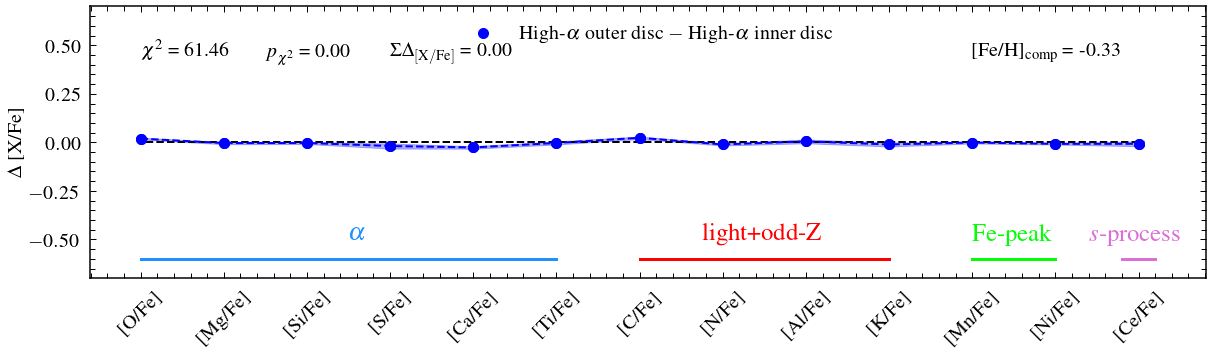

In [293]:
# inner high-α vs outer high-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_ha_outer, xfe_scatter_ha_inner, xfe_scatter_ha_outer)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_ha_outer)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_ha_outer**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_ha_outer-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'High-$\alpha$ outer disc $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)




Text(11.4, -0.5, '$s$-process')

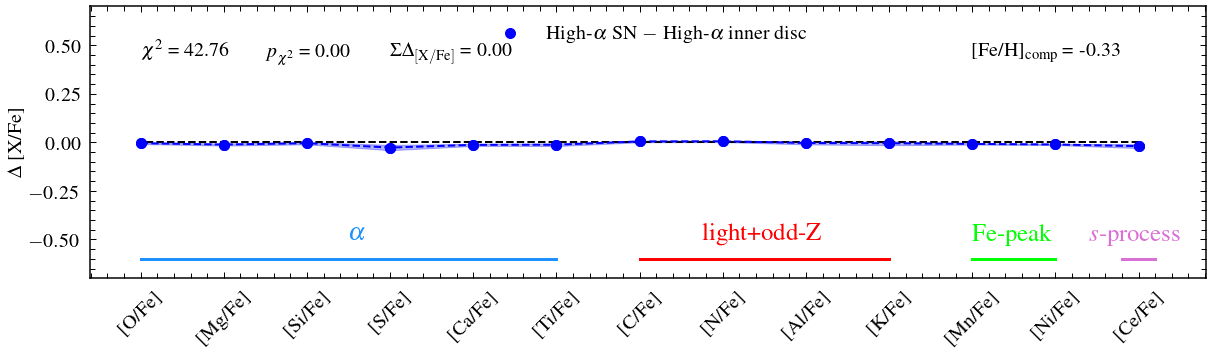

In [294]:
# inner high-α vs outer high-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_ha_sn, xfe_scatter_ha_inner, xfe_scatter_ha_sn)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_ha_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_ha_sn**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_ha_sn-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'High-$\alpha$ SN $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)





Text(11.4, -0.5, '$s$-process')

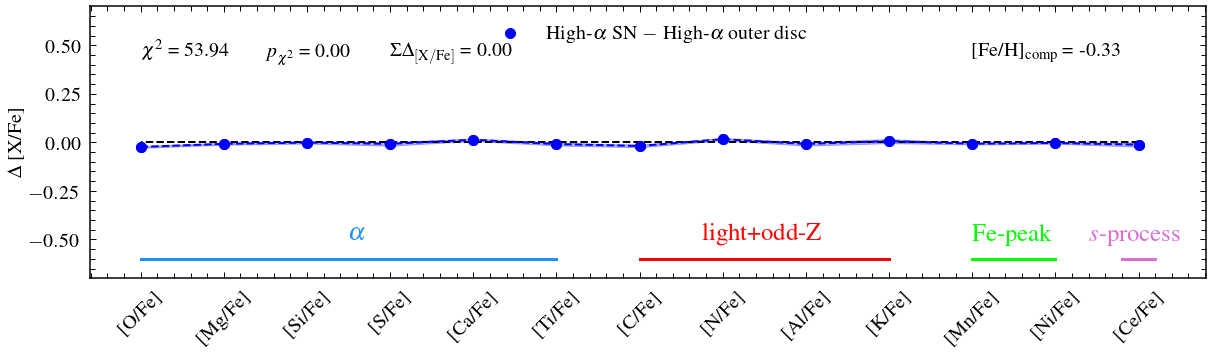

In [295]:
# inner high-α vs outer high-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_outer, xfe_mean_ha_sn, xfe_scatter_ha_outer, xfe_scatter_ha_sn)
diff = get_diff(xfe_mean_ha_outer, xfe_mean_ha_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_ha_sn**2+xfe_scatter_ha_outer**2)
diff_ha_inn_ha_outer  = xfe_mean_ha_sn-xfe_mean_ha_outer

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'High-$\alpha$ SN $-$ High-$\alpha$ outer disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)






# low-$\alpha$ vs low-$\alpha$

Text(11.4, -0.5, '$s$-process')

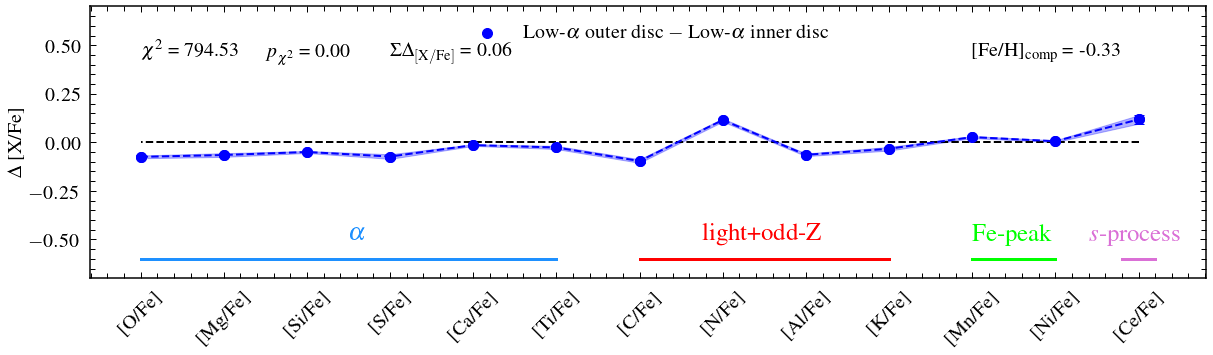

In [296]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_inner, xfe_mean_la_outer, xfe_scatter_la_inner, xfe_scatter_la_outer)
diff = get_diff(xfe_mean_la_inner, xfe_mean_la_outer)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_outer**2+xfe_scatter_la_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_outer-xfe_mean_la_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ outer disc $-$ Low-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)




Text(11.4, -0.5, '$s$-process')

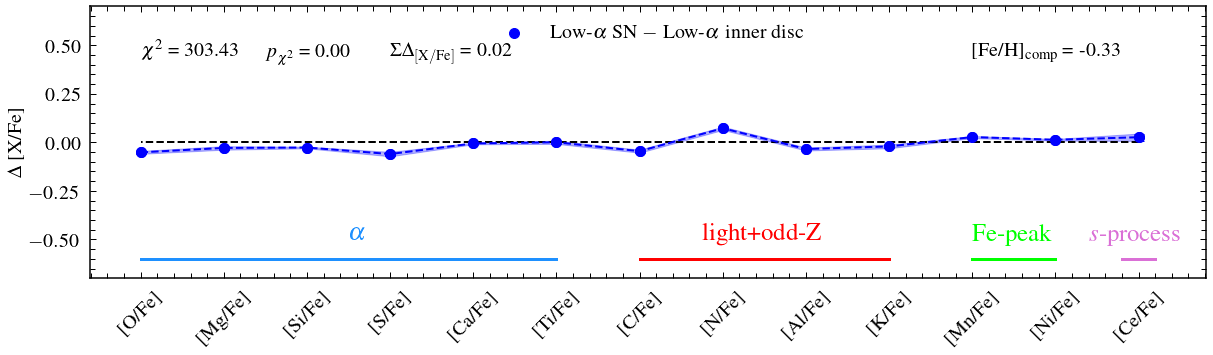

In [297]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_inner, xfe_mean_la_sn, xfe_scatter_la_inner, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_inner, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)





Text(11.4, -0.5, '$s$-process')

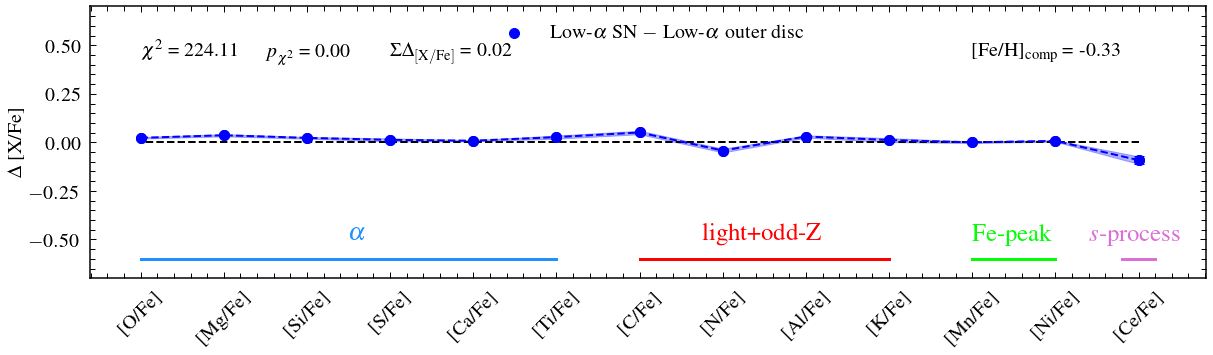

In [298]:
# inner low-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_la_outer, xfe_mean_la_sn, xfe_scatter_la_outer, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_la_outer, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_la_outer**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_la_outer

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ Low-$\alpha$ outer disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)






# low-$\alpha$ vs high-$\alpha$

Text(11.4, -0.5, '$s$-process')

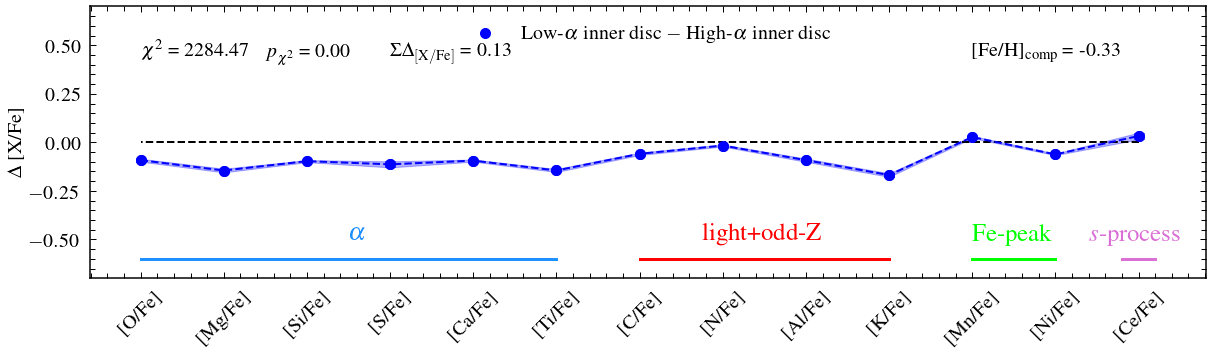

In [299]:
# inner high-α vs inner low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_inner, xfe_mean_la_inner, xfe_scatter_ha_inner, xfe_scatter_la_inner)
diff = get_diff(xfe_mean_ha_inner, xfe_mean_la_inner)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_inner**2+xfe_scatter_ha_inner**2)
diff_ha_inn_ha_outer  = xfe_mean_la_inner-xfe_mean_ha_inner

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ inner disc $-$ High-$\alpha$ inner disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)



Text(11.4, -0.5, '$s$-process')

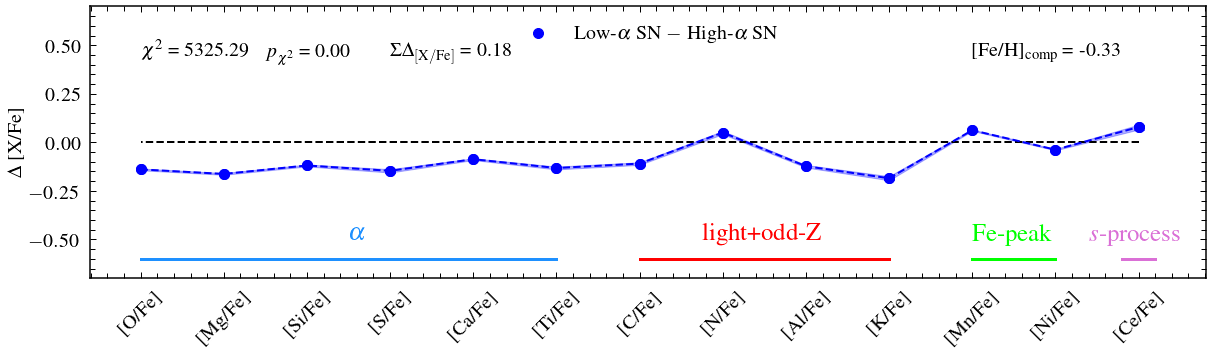

In [300]:
# inner high-α vs inner low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_sn, xfe_mean_la_sn, xfe_scatter_ha_sn, xfe_scatter_la_sn)
diff = get_diff(xfe_mean_ha_sn, xfe_mean_la_sn)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_sn**2+xfe_scatter_ha_sn**2)
diff_ha_inn_ha_outer  = xfe_mean_la_sn-xfe_mean_ha_sn

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ SN $-$ High-$\alpha$ SN')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)




Text(11.4, -0.5, '$s$-process')

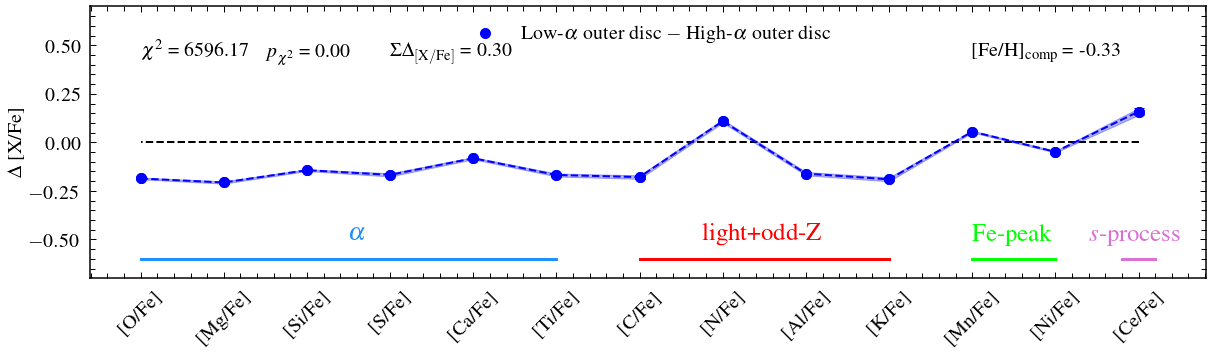

In [301]:
# outer high-α vs outer low-α
plt.figure(figsize=(20,5))
chi2 = get_chi2(xfe_mean_ha_outer, xfe_mean_la_outer, xfe_scatter_ha_outer, xfe_scatter_la_outer)
diff = get_diff(xfe_mean_ha_outer, xfe_mean_la_outer)
pvalue = 1 - stats.chi2.cdf(chi2, 12)

err_ha_inn_ha_outer = np.sqrt(xfe_scatter_la_outer**2+xfe_scatter_ha_outer**2)
diff_ha_inn_ha_outer  = xfe_mean_la_outer-xfe_mean_ha_outer

plt.fill_between(abundances_list, diff_ha_inn_ha_outer+err_ha_inn_ha_outer,diff_ha_inn_ha_outer-err_ha_inn_ha_outer,alpha=0.3,color='b' )
plt.errorbar(abundances_list,diff_ha_inn_ha_outer,yerr= err_ha_inn_ha_outer,fmt='o--',markersize=10, color='b',ecolor='b',\
             elinewidth=1, capsize=5)
plt.scatter(abundances_list,diff_ha_inn_ha_outer,c='b',s=100,label=r'Low-$\alpha$ outer disc $-$ High-$\alpha$ outer disc')
plt.hlines(0,12,0,ls='dashed',color='k')
plt.legend(loc='upper center',frameon=False,ncol=2,fontsize=20)
plt.tick_params(labelsize=20,direction='in',top=True,right=True,length=6)
plt.ylim(-0.7,0.7)
plt.xticks(rotation=45)
plt.ylabel(r'$\Delta$ [X/Fe]', fontsize=20)
plt.text(0,0.45,r'$\chi^{2}$ = '+str("{:.2f}".format(chi2)), fontsize=20)
plt.text(1.5,0.45,r'$p_{\chi^{2}}$ = '+str("{:.2f}".format(pvalue)), fontsize=20)
plt.text(3,0.45,r'$\Sigma$$\Delta_{\mathrm{[X/Fe]}}$ = '+str("{:.2f}".format(diff)), fontsize=20)
plt.text(10,0.45,r'[Fe/H]$_{\mathrm{comp}}$ = '+str(mfeh), fontsize=20)

plt.plot(abundances_list[:6], np.array([-0.6,-0.6,-0.6,-0.6,-0.6,-0.6]), c='dodgerblue',lw=3)
plt.plot(abundances_list[6:10], np.array([-0.6,-0.6,-0.6,-0.6]), c='r',lw=3)
plt.plot(abundances_list[10:12], np.array([-0.6,-0.6]), c='lime',lw=3)
plt.plot(np.array([11.8,12.2]), np.array([-0.6,-0.6]), c='orchid',lw=3)
plt.text(2.5,-0.5,r'$\alpha$',color='dodgerblue',fontsize=25)
plt.text(6.75,-0.5,r'light+odd-Z',color='r',fontsize=25)
plt.text(10.,-0.5,r'Fe-peak',color='lime',fontsize=25)
plt.text(11.4,-0.5,r'$s$-process',color='orchid',fontsize=25)


